In [1]:
import json
import numpy as np
import tweepy as twee
import time

# twitter developer credentials
json_credentials_file = open('local/credentials.json','r')
credentials = json.load(json_credentials_file)

auth = twee.OAuthHandler(credentials['consumer_key'], credentials['consumer_secret'])
auth.set_access_token(credentials['access_token'], credentials['access_token_secret'])
api = twee.API(auth)

# get activity-neighborhood for this user
reference_username = 'rednationrising'
json_target_string = 'activity_network_for_' + reference_username + '.json' # json save file name


In [2]:
# get overview of target_user

ref_user = api.get_user(reference_username)
print("screen name: " + reference_username)
print("name: " + ref_user.name)
print("description: " + ref_user.description)
print("protected? " + str(ref_user.protected))
print("verified? " + str(ref_user.verified))
print("followers_count: " + str(ref_user.followers_count))
print("friends_count: " + str(ref_user.friends_count))
print("listed_count: " + str(ref_user.listed_count))
print("favourites_count: " + str(ref_user.favourites_count))
print("statuses_count: " + str(ref_user.statuses_count))
print("created_at: " + str(ref_user.created_at))
print("profile image url: " + ref_user.profile_image_url_https)
    





screen name: rednationrising
name: Red Nation Rising
description: Welcome to the Official Red Nation Rising Twitter page! Grassroots organization for Education, Constitution and Civics. #RedNationRising
protected? False
verified? False
followers_count: 134506
friends_count: 57210
listed_count: 1274
favourites_count: 65035
statuses_count: 247118
created_at: 2012-11-11 02:02:13
profile image url: https://pbs.twimg.com/profile_images/649058305072046080/p0xwM_4E_normal.jpg


In [6]:
# look at some recent activity with a cursor

cursor = twee.Cursor(api.user_timeline, screen_name=reference_username)

user_history = {"timestamps":[],"favorite_count":[],"retweet_count":[],"entities":[]}
user_corpus = []
amplified_users = []
counter = 0
for status in cursor.items():
    print(' ')
    print(counter)
    print("created at: " + str(status.created_at))
    print(status.text)
  #  print("reply count: " + str(status.reply_count))  # only available for premium
    print("retweet_count: " + str(status.retweet_count))
    print("favorite_count: " + str(status.favorite_count))
  #  print("quote_count: " + str(status.quote_count))   # only available for premium
    print("entities: " + str(status.entities))
    counter += 1
    
    #try:
    #    print("quoted status.")
    #    print(status.quoted_status['user']['screen_name'])
    #    amplified_users.append(status.quoted_status['user']['screen_name'])  # why won't this work
    #except:
    #    print("not a quote")
        
    try:
        print("retweeted status.")
        if status.text[0:2] == 'RT':
            # tokenize
            words = status.text.split()
            # grab second token
            amplified_users.append(words[1])
            print(words[1])
        else:
            print(status.retweeted_status['user']['screen_name'])  # why won't this work
            amplified_users.append(status.retweeted_status['user']['screen_name'])
    except:
        print("not a retweet")
    
    user_history["timestamps"].append(status.created_at)
    user_history["favorite_count"].append(status.favorite_count)
    user_history["retweet_count"].append(status.retweet_count)
    user_history["entities"].append(status.entities) # handy access to urls, mentions, etc
    
    user_corpus.append(status.text)
    
    # print the users who have favorited this tweet
        # whoa, this is not available for the REST api
        # but you can apparently do it with streaming API
    # get users who have recently interacted with target_user




 
0
created at: 2018-05-31 17:02:11
RT @GaetaSusan: Twitter is preventing me from acquiring any new followers. In fact my followers have decreased substantially in the past fe…
retweet_count: 425
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 1370971824, u'indices': [3, 14], u'id_str': u'1370971824', u'screen_name': u'GaetaSusan', u'name': u'Susan\u2764 UnitedWeStand'}], u'hashtags': [], u'urls': []}
retweeted status.
@GaetaSusan:
 
1
created at: 2018-05-31 16:58:30
RT @OliverMcGee: There is a BLACK character in the movie #BlackPanther named ‘Man-Ape.’ Man-Ape is the leader of the Gorilla tribe. The gor…
retweet_count: 8192
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 202952121, u'indices': [3, 15], u'id_str': u'202952121', u'screen_name': u'OliverMcGee', u'name': u'Oliver McGee PhD MBA'}], u'hashtags': [{u'indices': [57, 70], u'text': u'BlackPanther'}], u'urls': []}
retweeted status.
@OliverMcGee:
 
2
created at: 2018-05-31 16:55:17


 
20
created at: 2018-05-31 02:44:23
Valerie Jarrett lives with Obama  
 
No, that’s not weird, said NO ONE ever https://t.co/DKltNR5XGL
retweet_count: 674
favorite_count: 718
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/DKltNR5XGL', u'indices': [76, 99], u'expanded_url': u'http://insider.foxnews.com/2017/03/02/valerie-jarrett-moves-obama-plot-against-trump-dc-mansion', u'display_url': u'insider.foxnews.com/2017/03/02/val\u2026'}]}
retweeted status.
not a retweet
 
21
created at: 2018-05-31 02:34:42
RT @Uncle_Jimbo: Every media outlet playing the #Parkland murderers videos 

Has blood on its hands

The little bastard says he did it to g…
retweet_count: 136
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 15757578, u'indices': [3, 15], u'id_str': u'15757578', u'screen_name': u'Uncle_Jimbo', u'name': u'Jim Hanson'}], u'hashtags': [{u'indices': [48, 57], u'text': u'Parkland'}], u'urls': []}
retweeted status.
@Un

 
40
created at: 2018-05-31 01:30:29
“Pelosi is an MS-13 lover” https://t.co/ggJK3rBxQe
retweet_count: 21
favorite_count: 43
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/RedNationRising/status/1001999324384030720/photo/1', u'display_url': u'pic.twitter.com/ggJK3rBxQe', u'url': u'https://t.co/ggJK3rBxQe', u'media_url_https': u'https://pbs.twimg.com/media/DefRAoZUwAAX6a4.jpg', u'id_str': u'1001999250887065600', u'sizes': {u'small': {u'h': 488, u'resize': u'fit', u'w': 680}, u'large': {u'h': 538, u'resize': u'fit', u'w': 750}, u'medium': {u'h': 538, u'resize': u'fit', u'w': 750}, u'thumb': {u'h': 150, u'resize': u'crop', u'w': 150}}, u'indices': [27, 50], u'type': u'photo', u'id': 1001999250887065600L, u'media_url': u'http://pbs.twimg.com/media/DefRAoZUwAAX6a4.jpg'}]}
retweeted status.
not a retweet
 
41
created at: 2018-05-31 01:22:23
RT @BuildKatesWall: Thought of the day: Weird how the generation who i

 
60
created at: 2018-05-30 23:22:08
When @HillaryClinton called black kids “superpredators”, where was the outrage we’re seeing from the Left towards… https://t.co/PbnuGEmhLJ
retweet_count: 55
favorite_count: 92
entities: {u'symbols': [], u'user_mentions': [{u'id': 1339835893, u'indices': [5, 20], u'id_str': u'1339835893', u'screen_name': u'HillaryClinton', u'name': u'Hillary Clinton'}], u'hashtags': [], u'urls': [{u'url': u'https://t.co/PbnuGEmhLJ', u'indices': [115, 138], u'expanded_url': u'https://twitter.com/i/web/status/1001967024648564736', u'display_url': u'twitter.com/i/web/status/1\u2026'}]}
retweeted status.
not a retweet
 
61
created at: 2018-05-30 23:19:11
RANDOM ACT OF KINDNESS: 8-year-old Maurice Adams, Jr. stopped to help an elderly woman up a flight of stairs. 

Thi… https://t.co/tACHImYYcv
retweet_count: 116
favorite_count: 244
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/tACHImYYcv', u'indices': [117, 140], u'exp

 
80
created at: 2018-05-30 16:34:26
How ironic.

@JoyAnnReid and @TheRevAl lecturing on racism. 
 
Let that sink in for a moment. https://t.co/EVT60B53Eg
retweet_count: 14
favorite_count: 27
entities: {u'symbols': [], u'user_mentions': [{u'id': 49698134, u'indices': [13, 24], u'id_str': u'49698134', u'screen_name': u'JoyAnnReid', u'name': u'Joy Reid'}, {u'id': 42389136, u'indices': [29, 38], u'id_str': u'42389136', u'screen_name': u'TheRevAl', u'name': u'Reverend Al Sharpton'}], u'hashtags': [], u'urls': [{u'url': u'https://t.co/EVT60B53Eg', u'indices': [94, 117], u'expanded_url': u'https://twitter.com/NBCPolitics/status/1001507719352897537', u'display_url': u'twitter.com/NBCPolitics/st\u2026'}]}
retweeted status.
not a retweet
 
81
created at: 2018-05-30 16:28:33
RT @realDonaldTrump: Bob Iger of ABC called Valerie Jarrett to let her know that “ABC does not tolerate comments like those” made by Rosean…
retweet_count: 43695
favorite_count: 0
entities: {u'symbols': [], u'user_mentions':

 
100
created at: 2018-05-30 14:05:02
Trey Gowdy is covering for a corrupt FBI leadership under Obama. 
 
                          WHY?

https://t.co/THbMVlVf5H
retweet_count: 168
favorite_count: 212
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/THbMVlVf5H', u'indices': [100, 123], u'expanded_url': u'http://www.thegatewaypundit.com/2018/05/trey-gowdy-fbi-did-what-americans-would-want-them-to-do-by-spying-on-opposition-party-in-2016-video/', u'display_url': u'thegatewaypundit.com/2018/05/trey-g\u2026'}]}
retweeted status.
not a retweet
 
101
created at: 2018-05-30 13:58:02
Let’s prove we are a nation of laws and not a nation of double standards &amp; privileged people making the rules! It’s… https://t.co/S0rJbETLKC
retweet_count: 42
favorite_count: 49
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/S0rJbETLKC', u'indices': [121, 144], u'expanded_url': u'https://twitter.com/i/web/st

 
120
created at: 2018-05-30 03:57:15
RT @griffm601: @rromona @RedNationRising @PradRachael @RuthieRedSox As a Black American I've never understood how Blacks can be racist but…
retweet_count: 26
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 190413136, u'indices': [3, 13], u'id_str': u'190413136', u'screen_name': u'griffm601', u'name': u'TheGriff'}, {u'id': 21791956, u'indices': [15, 23], u'id_str': u'21791956', u'screen_name': u'rromona', u'name': u'Romona'}, {u'id': 940368062, u'indices': [24, 40], u'id_str': u'940368062', u'screen_name': u'RedNationRising', u'name': u'Red Nation Rising'}, {u'id': 928996263957352448L, u'indices': [41, 53], u'id_str': u'928996263957352448', u'screen_name': u'PradRachael', u'name': u'\U0001f1fa\U0001f1f8@PradRachael \U0001f1fa\U0001f1f8'}, {u'id': 1931084401, u'indices': [54, 67], u'id_str': u'1931084401', u'screen_name': u'RuthieRedSox', u'name': u'RuthieRedSox'}], u'hashtags': [], u'urls': []}
retweeted status.
@griffm601:
 

 
140
created at: 2018-05-30 02:16:32
@angelsinflight7 Too late https://t.co/yE3ohd1IRl
retweet_count: 1
favorite_count: 3
entities: {u'symbols': [], u'user_mentions': [{u'id': 206308167, u'indices': [0, 16], u'id_str': u'206308167', u'screen_name': u'angelsinflight7', u'name': u'Lisa Jayne Skender'}], u'hashtags': [], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/RedNationRising/status/1001648525640458240/photo/1', u'display_url': u'pic.twitter.com/yE3ohd1IRl', u'url': u'https://t.co/yE3ohd1IRl', u'media_url_https': u'https://pbs.twimg.com/tweet_video_thumb/DeaSAUVVAAEpbRa.jpg', u'id_str': u'1001648501292335105', u'sizes': {u'small': {u'h': 240, u'resize': u'fit', u'w': 244}, u'large': {u'h': 240, u'resize': u'fit', u'w': 244}, u'medium': {u'h': 240, u'resize': u'fit', u'w': 244}, u'thumb': {u'h': 150, u'resize': u'crop', u'w': 150}}, u'indices': [26, 49], u'type': u'photo', u'id': 1001648501292335105L, u'media_url': u'http://pbs.twimg.com/tweet_video_thumb/DeaSAUVVA

 
160
created at: 2018-05-30 01:20:58
"Imagine for a second if there were spies in Hillary's campaign." -@seanhannity. We would be experiencing a civil w… https://t.co/OGFHhvqg0y
retweet_count: 44
favorite_count: 91
entities: {u'symbols': [], u'user_mentions': [{u'id': 41634520, u'indices': [67, 79], u'id_str': u'41634520', u'screen_name': u'seanhannity', u'name': u'Sean Hannity'}], u'hashtags': [], u'urls': [{u'url': u'https://t.co/OGFHhvqg0y', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/1001634542237704193', u'display_url': u'twitter.com/i/web/status/1\u2026'}]}
retweeted status.
not a retweet
 
161
created at: 2018-05-30 01:18:10
.@seanhannity is showing highlights of the MSM tirade regarding the previous Trump/NoKo negotiation breakdown. They… https://t.co/iMgCpNNOR0
retweet_count: 11
favorite_count: 28
entities: {u'symbols': [], u'user_mentions': [{u'id': 41634520, u'indices': [1, 13], u'id_str': u'41634520', u'screen_name': u'seanhannity', u'name':

 
180
created at: 2018-05-30 00:36:02
"Phil Bredesen supported her and he supported her ideas. He opposes the border wall." -DJT | #RedNationRising https://t.co/2Jc6kJJRoR
retweet_count: 24
favorite_count: 17
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [93, 109], u'text': u'RedNationRising'}], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/RedNationRising/status/1001623232884170752/photo/1', u'display_url': u'pic.twitter.com/2Jc6kJJRoR', u'url': u'https://t.co/2Jc6kJJRoR', u'media_url_https': u'https://pbs.twimg.com/media/DeZ6-LWU8AAzZXG.jpg', u'id_str': u'1001623175753428992', u'sizes': {u'small': {u'h': 389, u'resize': u'fit', u'w': 680}, u'large': {u'h': 480, u'resize': u'fit', u'w': 840}, u'medium': {u'h': 480, u'resize': u'fit', u'w': 840}, u'thumb': {u'h': 150, u'resize': u'crop', u'w': 150}}, u'indices': [110, 133], u'type': u'photo', u'id': 1001623175753428992L, u'media_url': u'http://pbs.twimg.com/media/DeZ6-LWU8AAzZXG.jpg'}]}
r

 
200
created at: 2018-05-29 23:14:21
What's the difference between Rosanne Barr and Tommy Robinson? Rosanne hasn't been incarcerated...yet. | #RedNationRising
retweet_count: 29
favorite_count: 43
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [105, 121], u'text': u'RedNationRising'}], u'urls': []}
retweeted status.
not a retweet
 
201
created at: 2018-05-29 23:12:39
Wanna test the integrity of Starbuck's diversity training? | #RedNationRising https://t.co/liGAIIKf7W
retweet_count: 226
favorite_count: 319
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [61, 77], u'text': u'RedNationRising'}], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/RedNationRising/status/1001602248496041984/photo/1', u'display_url': u'pic.twitter.com/liGAIIKf7W', u'url': u'https://t.co/liGAIIKf7W', u'media_url_https': u'https://pbs.twimg.com/media/DeZn6U-UQAANNUr.jpg', u'id_str': u'1001602218896670720', u'sizes': {u'small': {u'h': 431, u'r

 
220
created at: 2018-05-29 21:02:35
#BoycottABC 
#BoycottABC 
#BoycottABC 
#BoycottABC 
#BoycottABC 
#BoycottABC 
#BoycottABC 
#BoycottABC 
#BoycottABC… https://t.co/tmkZ8ISOey
retweet_count: 389
favorite_count: 512
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [0, 11], u'text': u'BoycottABC'}, {u'indices': [13, 24], u'text': u'BoycottABC'}, {u'indices': [26, 37], u'text': u'BoycottABC'}, {u'indices': [39, 50], u'text': u'BoycottABC'}, {u'indices': [52, 63], u'text': u'BoycottABC'}, {u'indices': [65, 76], u'text': u'BoycottABC'}, {u'indices': [78, 89], u'text': u'BoycottABC'}, {u'indices': [91, 102], u'text': u'BoycottABC'}, {u'indices': [104, 115], u'text': u'BoycottABC'}], u'urls': [{u'url': u'https://t.co/tmkZ8ISOey', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/1001569515166191616', u'display_url': u'twitter.com/i/web/status/1\u2026'}]}
retweeted status.
not a retweet
 
221
created at: 2018-05-29 20:56:16
Meet Valerie J

 
240
created at: 2018-05-29 16:52:59
RT @Lrihendry: 29 people shot and 8 murdered over them memorial day weekend in Chicago! Where is David Hogg and his friends laying in the s…
retweet_count: 3528
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 129235890, u'indices': [3, 13], u'id_str': u'129235890', u'screen_name': u'Lrihendry', u'name': u'Lori Hendry'}], u'hashtags': [], u'urls': []}
retweeted status.
@Lrihendry:
 
241
created at: 2018-05-29 16:51:01
I support Trump’s plan to cut aid to countries that don’t actively help America apprehend MS-13 gang members. 
 
Retweet if you do too!
retweet_count: 163
favorite_count: 206
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': []}
retweeted status.
not a retweet
 
242
created at: 2018-05-29 16:47:22
RT @doc_jason: @tracybeanz @almostjingo In 2015 I blew the whistle on the release of alien children to criminals by @ICEgov and @HHSGov und…
retweet_count: 515
favorite_count: 0
entities: {u'sy

 
260
created at: 2018-05-29 13:01:55
RT @realDonaldTrump: Sorry, I’ve got to start focusing my energy on North Korea Nuclear, bad Trade Deals, VA Choice, the Economy, rebuildin…
retweet_count: 28384
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 25073877, u'indices': [3, 19], u'id_str': u'25073877', u'screen_name': u'realDonaldTrump', u'name': u'Donald J. Trump'}], u'hashtags': [], u'urls': []}
retweeted status.
@realDonaldTrump:
 
261
created at: 2018-05-29 13:01:51
RT @realDonaldTrump: Why aren’t the 13 Angry and heavily conflicted Democrats investigating the totally Crooked Campaign of totally Crooked…
retweet_count: 18429
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 25073877, u'indices': [3, 19], u'id_str': u'25073877', u'screen_name': u'realDonaldTrump', u'name': u'Donald J. Trump'}], u'hashtags': [], u'urls': []}
retweeted status.
@realDonaldTrump:
 
262
created at: 2018-05-29 13:01:42
RT @realDonaldTrump: The 13 Angry Democrat

 
280
created at: 2018-05-29 03:35:56
RT @TimBurt: Romans 16:20 "And the God of peace will crush Satan under your feet shortly. The grace of our Lord Jesus Christ be with you. A…
retweet_count: 228
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 17522884, u'indices': [3, 11], u'id_str': u'17522884', u'screen_name': u'TimBurt', u'name': u'Tim Burt'}], u'hashtags': [], u'urls': []}
retweeted status.
@TimBurt:
 
281
created at: 2018-05-29 03:22:07
RT @CStevenTucker: Beautiful photo taken at 
Ft. Snelling National Cemetery. https://t.co/aNTZr3Irjl #MAGA #tcot #trumptrain 
#MemorialDay2…
retweet_count: 19
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 16692171, u'indices': [3, 17], u'id_str': u'16692171', u'screen_name': u'CStevenTucker', u'name': u'Deplorable CStevenTucker'}], u'hashtags': [{u'indices': [101, 106], u'text': u'MAGA'}, {u'indices': [107, 112], u'text': u'tcot'}, {u'indices': [113, 124], u'text': u'trumptrain'}], u'urls': [{u'u

 
300
created at: 2018-05-29 01:41:34
The liberal world of gun control is a lot like The Matrix; lots of make believe and little reality. |… https://t.co/pZ2UbK4EkR
retweet_count: 26
favorite_count: 47
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/pZ2UbK4EkR', u'indices': [103, 126], u'expanded_url': u'https://twitter.com/i/web/status/1001277335084109824', u'display_url': u'twitter.com/i/web/status/1\u2026'}]}
retweeted status.
not a retweet
 
301
created at: 2018-05-29 01:37:43
Sweltering heat in Boston. A long coat. A protrusion on her back. What’s the runner-up trying to hide? |… https://t.co/xfqoncHquH
retweet_count: 25
favorite_count: 45
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/xfqoncHquH', u'indices': [106, 129], u'expanded_url': u'https://twitter.com/i/web/status/1001276369626648576', u'display_url': u'twitter.com/i/web/status/1\u2026'}]}
retweeted status.
not a retwe

 
320
created at: 2018-05-29 00:11:47
RT @realDonaldTrump: A Democratic lawmaker just introduced a bill to Repeal the GOP Tax Cuts (no chance). This is too good to be true for R…
retweet_count: 26390
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 25073877, u'indices': [3, 19], u'id_str': u'25073877', u'screen_name': u'realDonaldTrump', u'name': u'Donald J. Trump'}], u'hashtags': [], u'urls': []}
retweeted status.
@realDonaldTrump:
 
321
created at: 2018-05-29 00:11:27
RT @realDonaldTrump: California has a rare opportunity to turn things around and solve its high crime, high tax, problems - along with so m…
retweet_count: 24388
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 25073877, u'indices': [3, 19], u'id_str': u'25073877', u'screen_name': u'realDonaldTrump', u'name': u'Donald J. Trump'}], u'hashtags': [], u'urls': []}
retweeted status.
@realDonaldTrump:
 
322
created at: 2018-05-29 00:06:50
You can get fined and even arrested for fi

 
340
created at: 2018-05-28 19:54:27
RT @KellyannePolls: Beautiful &amp; uplifting yard sign. #MemorialDay2018 https://t.co/dYVjydQxWI
retweet_count: 797
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 471672239, u'indices': [3, 18], u'id_str': u'471672239', u'screen_name': u'KellyannePolls', u'name': u'Kellyanne Conway'}], u'hashtags': [{u'indices': [57, 73], u'text': u'MemorialDay2018'}], u'urls': [], u'media': [{u'source_user_id': 471672239, u'source_status_id_str': u'1001181458726309889', u'expanded_url': u'https://twitter.com/KellyannePolls/status/1001181458726309889/photo/1', u'display_url': u'pic.twitter.com/dYVjydQxWI', u'url': u'https://t.co/dYVjydQxWI', u'media_url_https': u'https://pbs.twimg.com/media/DeTpOwbW4AYmNL4.jpg', u'source_user_id_str': u'471672239', u'source_status_id': 1001181458726309889L, u'id_str': u'1001181456910180358', u'sizes': {u'large': {u'h': 1594, u'resize': u'fit', u'w': 2048}, u'small': {u'h': 529, u'resize': u'fit', u'w': 680

 
360
created at: 2018-05-28 16:44:38
“They sleep in the land they made free, under the flag they rendered stainless, under the solemn pines, the sad hem… https://t.co/yyKxILYQHH
retweet_count: 16
favorite_count: 27
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/yyKxILYQHH', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/1001142213068443650', u'display_url': u'twitter.com/i/web/status/1\u2026'}]}
retweeted status.
not a retweet
 
361
created at: 2018-05-28 16:44:33
No, Mr. President. We’re not tired of #winning yet! 🇺🇸 https://t.co/B0s1zzn2dk
retweet_count: 11
favorite_count: 28
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [38, 46], u'text': u'winning'}], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/RedNationRising/status/1001142192096841728/photo/1', u'display_url': u'pic.twitter.com/B0s1zzn2dk', u'url': u'https://t.co/B0s1zzn2dk', u'media_url_https': u'h

 
380
created at: 2018-05-28 04:04:39
RT @Corrynmb: This Memorial Day remember our fallen heroes &amp; their families. They have paid the ultimate price to ensure &amp; preserve our fre…
retweet_count: 145
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 24233697, u'indices': [3, 12], u'id_str': u'24233697', u'screen_name': u'Corrynmb', u'name': u'Corryn\U0001f33b'}], u'hashtags': [], u'urls': []}
retweeted status.
@Corrynmb:
 
381
created at: 2018-05-28 04:03:51
RT @bonniemurphy: @PhilMcCrackin44 @ArizonaKayte @pinkk9lover @SusanStormXO @KatTheHammer1 @Patriot_Mom_17 @PatriotJenn @pamelaval @Gartrel…
retweet_count: 247
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 21677872, u'indices': [3, 16], u'id_str': u'21677872', u'screen_name': u'bonniemurphy', u'name': u'BoomBoom\U0001f44aPow\U0001f4a5'}, {u'id': 714234573345931264L, u'indices': [18, 34], u'id_str': u'714234573345931264', u'screen_name': u'PhilMcCrackin44', u'name': u'Dash Riproc

 
400
created at: 2018-05-28 03:32:20
RT @RedNationRising: We ask you God to bless them, keep them safe, give them the wisdom &amp; the strength to lead this nation, in Jesus name,…
retweet_count: 135
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 940368062, u'indices': [3, 19], u'id_str': u'940368062', u'screen_name': u'RedNationRising', u'name': u'Red Nation Rising'}], u'hashtags': [], u'urls': []}
retweeted status.
@RedNationRising:
 
401
created at: 2018-05-28 03:32:06
RT @RedNationRising: The cat uses sign language to tell deaf owner she wants food.  https://t.co/635fxv02XD
retweet_count: 127
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 940368062, u'indices': [3, 19], u'id_str': u'940368062', u'screen_name': u'RedNationRising', u'name': u'Red Nation Rising'}], u'hashtags': [], u'urls': [], u'media': [{u'source_user_id': 288633456, u'source_status_id_str': u'668470310442835968', u'expanded_url': u'https://twitter.com/birdahabak/st

 
420
created at: 2018-05-28 03:26:24
RT @RedNationRising: “Most of them were boys when they died, &amp; they gave up 2 lives - the one they were liv­ing &amp; the one they would have l…
retweet_count: 97
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 940368062, u'indices': [3, 19], u'id_str': u'940368062', u'screen_name': u'RedNationRising', u'name': u'Red Nation Rising'}], u'hashtags': [], u'urls': []}
retweeted status.
@RedNationRising:
 
421
created at: 2018-05-28 03:26:14
RT @RedNationRising: “It’s the soldier, not the reporter, who has given us freedom of the press.” #MemorialDay #MemorialDayWeekend https://…
retweet_count: 85
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 940368062, u'indices': [3, 19], u'id_str': u'940368062', u'screen_name': u'RedNationRising', u'name': u'Red Nation Rising'}], u'hashtags': [{u'indices': [98, 110], u'text': u'MemorialDay'}, {u'indices': [111, 130], u'text': u'MemorialDayWeekend'}], u'urls': []}


 
440
created at: 2018-05-28 01:23:17
There are certain CEOs who have chosen illegals over Americans due to greater profit margin. Their selfishness need… https://t.co/uxPJ7mItVC
retweet_count: 111
favorite_count: 148
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/uxPJ7mItVC', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/1000910347430191104', u'display_url': u'twitter.com/i/web/status/1\u2026'}]}
retweeted status.
not a retweet
 
441
created at: 2018-05-28 01:00:33
United Kuckistan calls Nic Madge a judge. I call him a jackass. He proposed filing down kitchen knives to combat th… https://t.co/4HGSGfqxyw
retweet_count: 23
favorite_count: 50
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/4HGSGfqxyw', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/1000904624839233536', u'display_url': u'twitter.com/i/web/status/1\u2026'}]}
re

 
460
created at: 2018-05-27 18:26:40
With their #resistance, LIES &amp; deranged membership, I must ask:

Is there ANYTHING more PATHETIC than the DEMOCRATI… https://t.co/OF8TCfI6tj
retweet_count: 87
favorite_count: 119
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [11, 22], u'text': u'resistance'}], u'urls': [{u'url': u'https://t.co/OF8TCfI6tj', u'indices': [121, 144], u'expanded_url': u'https://twitter.com/i/web/status/1000805500928319494', u'display_url': u'twitter.com/i/web/status/1\u2026'}]}
retweeted status.
not a retweet
 
461
created at: 2018-05-27 18:14:39
Modern day liberalism attempts to blur the lines of honesty, reality, and morality. Example: ignoring Obama/Hillary… https://t.co/lk759Dnt8U
retweet_count: 46
favorite_count: 66
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/lk759Dnt8U', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/1000802476558340098', u'displa

 
480
created at: 2018-05-27 15:06:25
RT @CharlesOrtel: Note to ARROGANT, SPOILED AND TONE-DEAF @ChelseaClinton "public charities" may not engage in partisan political activitie…
retweet_count: 246
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 30244119, u'indices': [3, 16], u'id_str': u'30244119', u'screen_name': u'CharlesOrtel', u'name': u'Charles Ortel'}, {u'id': 757303975, u'indices': [58, 73], u'id_str': u'757303975', u'screen_name': u'ChelseaClinton', u'name': u'Chelsea Clinton'}], u'hashtags': [], u'urls': []}
retweeted status.
@CharlesOrtel:
 
481
created at: 2018-05-27 15:03:05
Former spy chiefs are desperate to hide their crimes using the MSM. They're not fooling anyone anymore except, the… https://t.co/xow7VUhhiQ
retweet_count: 63
favorite_count: 123
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/xow7VUhhiQ', u'indices': [116, 139], u'expanded_url': u'https://twitter.com/i/web/status/10007542705122

 
500
created at: 2018-05-27 01:54:59
I'm a little tired of calling those that work in government "public servants". They are highly paid with pensions n… https://t.co/sx4RBVHml1
retweet_count: 484
favorite_count: 741
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/sx4RBVHml1', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/1000555937546035200', u'display_url': u'twitter.com/i/web/status/1\u2026'}]}
retweeted status.
not a retweet
 
501
created at: 2018-05-27 01:50:13
If you behaved like your government you'd be arrested.
retweet_count: 54
favorite_count: 110
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': []}
retweeted status.
not a retweet
 
502
created at: 2018-05-27 01:39:13
Make no mistake. Democrats aren't branding themselves as anti-Trump, they're branding themselves as anti-American.… https://t.co/sJkLnqhECS
retweet_count: 446
favorite_count: 720
entities: {u'symbols': []

 
520
created at: 2018-05-26 20:21:22
RT @hrtablaze: President Reagan tried to warn us. We are at a fork in the road. What is happening in Europe is a disgrace , we must not let…
retweet_count: 186
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 896258742, u'indices': [3, 13], u'id_str': u'896258742', u'screen_name': u'hrtablaze', u'name': u'Oak-Town \u2622Unfiltered\u2122'}], u'hashtags': [], u'urls': []}
retweeted status.
@hrtablaze:
 
521
created at: 2018-05-26 20:19:19
RT @realDonaldTrump: This whole Russia Probe is Rigged. Just an excuse as to why the Dems and Crooked Hillary lost the Election and States…
retweet_count: 21671
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 25073877, u'indices': [3, 19], u'id_str': u'25073877', u'screen_name': u'realDonaldTrump', u'name': u'Donald J. Trump'}], u'hashtags': [], u'urls': []}
retweeted status.
@realDonaldTrump:
 
522
created at: 2018-05-26 20:13:18
RT @JohnFromCranber: BRITAIN/Tommy Robi

 
540
created at: 2018-05-26 04:26:27
RT @pspministry: ~ @mattrbarnes There is hope for America and it's not found in policy, but in the proclamation of Truth &amp; the prayers of G…
retweet_count: 36
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 460694363, u'indices': [3, 15], u'id_str': u'460694363', u'screen_name': u'pspministry', u'name': u'PublicServantsPrayer'}, {u'id': 33981209, u'indices': [19, 31], u'id_str': u'33981209', u'screen_name': u'mattrbarnes', u'name': u'Chaplain Matt Barnes'}], u'hashtags': [], u'urls': []}
retweeted status.
@pspministry:
 
541
created at: 2018-05-26 04:25:27
RT @pspministry: #Pray4Leaders @pspministry https://t.co/6dbMvw4dfS
retweet_count: 80
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 460694363, u'indices': [3, 15], u'id_str': u'460694363', u'screen_name': u'pspministry', u'name': u'PublicServantsPrayer'}, {u'id': 460694363, u'indices': [31, 43], u'id_str': u'460694363', u'screen_name': u'pspmi

 
560
created at: 2018-05-26 01:06:06
RT @RepLeeZeldin: Hot off the press! Here's the now filed 12 pg H.Res.907 w 25 original cosponsors, detailing misconduct at highest levels…
retweet_count: 8504
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 2750127259L, u'indices': [3, 16], u'id_str': u'2750127259', u'screen_name': u'RepLeeZeldin', u'name': u'Lee Zeldin'}], u'hashtags': [], u'urls': []}
retweeted status.
@RepLeeZeldin:
 
561
created at: 2018-05-26 01:04:04
RT @bonniemurphy: What do you want to bet these two are laughing their butts off at #CNN and enemies?? https://t.co/ZOur1cCzIn
retweet_count: 539
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 21677872, u'indices': [3, 16], u'id_str': u'21677872', u'screen_name': u'bonniemurphy', u'name': u'BoomBoom\U0001f44aPow\U0001f4a5'}], u'hashtags': [{u'indices': [84, 88], u'text': u'CNN'}], u'urls': [], u'media': [{u'source_user_id': 21677872, u'source_status_id_str': u'1000145200860327936'

 
580
created at: 2018-05-25 21:55:26
RT @Doodisgirl: Oregon HS Student Addison Barnes, Sues School for Not Allowing Him to Wear Pro-Trump Shirt..
BUT, he’d be just fine in a “B…
retweet_count: 336
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 46808996, u'indices': [3, 14], u'id_str': u'46808996', u'screen_name': u'Doodisgirl', u'name': u'Ann \U0001f54a'}], u'hashtags': [], u'urls': []}
retweeted status.
@Doodisgirl:
 
581
created at: 2018-05-25 21:52:15
Our veterans deserve better care after they defend our nation. Some still face their demons every day. Our governme… https://t.co/NYCePy9Twk
retweet_count: 24
favorite_count: 36
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/NYCePy9Twk', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/1000132463195238400', u'display_url': u'twitter.com/i/web/status/1\u2026'}]}
retweeted status.
not a retweet
 
582
created at: 2018-05-25 21:46:33
I

 
600
created at: 2018-05-25 12:26:22
Once a fraud, always a fraud. Integrity is like virginity; once lost, it can never be restored. | #RedNationRising https://t.co/nCqlhSUlrg
retweet_count: 52
favorite_count: 77
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [98, 114], u'text': u'RedNationRising'}], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/RedNationRising/status/999990052343156739/photo/1', u'display_url': u'pic.twitter.com/nCqlhSUlrg', u'url': u'https://t.co/nCqlhSUlrg', u'media_url_https': u'https://pbs.twimg.com/media/DeCtpgmU0AUcVxa.jpg', u'id_str': u'999990045913174021', u'sizes': {u'large': {u'h': 1395, u'resize': u'fit', u'w': 1124}, u'small': {u'h': 680, u'resize': u'fit', u'w': 548}, u'medium': {u'h': 1200, u'resize': u'fit', u'w': 967}, u'thumb': {u'h': 150, u'resize': u'crop', u'w': 150}}, u'indices': [115, 138], u'type': u'photo', u'id': 999990045913174021L, u'media_url': u'http://pbs.twimg.com/media/DeCtpgmU0AUcVxa.jpg'

 
620
created at: 2018-05-24 21:20:45
RT @realDonaldTrump: Today, it was my great honor to present the #MedalOfHonor to @USNavy (SEAL) Master Chief Special Warfare Operator Brit…
retweet_count: 14957
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 25073877, u'indices': [3, 19], u'id_str': u'25073877', u'screen_name': u'realDonaldTrump', u'name': u'Donald J. Trump'}, {u'id': 54885400, u'indices': [82, 89], u'id_str': u'54885400', u'screen_name': u'USNavy', u'name': u'U.S. Navy'}], u'hashtags': [{u'indices': [65, 78], u'text': u'MedalOfHonor'}], u'urls': []}
retweeted status.
@realDonaldTrump:
 
621
created at: 2018-05-24 21:16:30
The nation which forgets it defenders will itself be forgotten. - Calvin Cooledge

Take time this… https://t.co/0ABUB4Tevo
retweet_count: 61
favorite_count: 102
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/0ABUB4Tevo', u'indices': [99, 122], u'expanded_url': u'https://twitter.com/i/w

 
640
created at: 2018-05-24 15:46:06
The @NFL misspelled “profit reaction.” It’s why they chase a pigskin on a grass field instead of building rockets a… https://t.co/RWnVhUeikJ
retweet_count: 4
favorite_count: 8
entities: {u'symbols': [], u'user_mentions': [{u'id': 19426551, u'indices': [4, 8], u'id_str': u'19426551', u'screen_name': u'NFL', u'name': u'NFL'}], u'hashtags': [], u'urls': [{u'url': u'https://t.co/RWnVhUeikJ', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/999677930098880512', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
641
created at: 2018-05-24 15:40:20
“Where other president? He bow. He cave. You no fun. You no welcome here, golden hair bully.” | #RedNationRising https://t.co/JwudbRvkrM
retweet_count: 34
favorite_count: 59
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [96, 112], u'text': u'RedNationRising'}], u'urls': [], u'media': [{u'expanded_url': u'https://twitt

 
660
created at: 2018-05-24 02:56:28
Tucker Carlson and Joe diGenova Discuss “Spygate” – FBI Political Spy Operations https://t.co/uxVYXGQFj6
retweet_count: 10
favorite_count: 20
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/uxVYXGQFj6', u'indices': [81, 104], u'expanded_url': u'https://youtu.be/joGusWL1bzI', u'display_url': u'youtu.be/joGusWL1bzI'}]}
retweeted status.
not a retweet
 
661
created at: 2018-05-24 02:54:07
RT @realDonaldTrump: I'd bet a good lawyer could make a great case out of the fact that President Obama was tapping my phones in October, j…
retweet_count: 38995
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 25073877, u'indices': [3, 19], u'id_str': u'25073877', u'screen_name': u'realDonaldTrump', u'name': u'Donald J. Trump'}], u'hashtags': [], u'urls': []}
retweeted status.
@realDonaldTrump:
 
662
created at: 2018-05-24 02:51:27
@jojoh888 😍😘🐶🐾🐾
retweet_count: 0
favorite_count: 2
entities: 

 
680
created at: 2018-05-24 01:29:08
RT @850Sunny: Good Night 💖 https://t.co/xJF0JZuD3d
retweet_count: 5
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 1887844819, u'indices': [3, 12], u'id_str': u'1887844819', u'screen_name': u'850Sunny', u'name': u'Sunny Flowers'}], u'hashtags': [], u'urls': [], u'media': [{u'source_user_id': 1887844819, u'source_status_id_str': u'999453159692161024', u'expanded_url': u'https://twitter.com/850Sunny/status/999453159692161024/photo/1', u'display_url': u'pic.twitter.com/xJF0JZuD3d', u'url': u'https://t.co/xJF0JZuD3d', u'media_url_https': u'https://pbs.twimg.com/media/Dd7FQGCVQAAYEEs.jpg', u'source_user_id_str': u'1887844819', u'source_status_id': 999453159692161024L, u'id_str': u'999453047611801600', u'sizes': {u'small': {u'h': 196, u'resize': u'fit', u'w': 257}, u'large': {u'h': 196, u'resize': u'fit', u'w': 257}, u'medium': {u'h': 196, u'resize': u'fit', u'w': 257}, u'thumb': {u'h': 150, u'resize': u'crop', u'w': 150}}, u'ind

 
700
created at: 2018-05-23 22:09:48
RETWEET if you LOVE Trump's idea to take away $1M of Central American aid money for each of their citizens that illegally crash our border!
retweet_count: 354
favorite_count: 440
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': []}
retweeted status.
not a retweet
 
701
created at: 2018-05-23 22:04:42
RT @bocavista2016: 🚨BUSTED🚨

Dems and their #FakeNews flunkies claim #Russians were the target of #SpyGate not @realDonaldTrump

But #Evely…
retweet_count: 575
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 4175166177L, u'indices': [3, 17], u'id_str': u'4175166177', u'screen_name': u'bocavista2016', u'name': u'Boca Vista'}, {u'id': 25073877, u'indices': [111, 127], u'id_str': u'25073877', u'screen_name': u'realDonaldTrump', u'name': u'Donald J. Trump'}], u'hashtags': [{u'indices': [44, 53], u'text': u'FakeNews'}, {u'indices': [69, 78], u'text': u'Russians'}, {u'indices': [98, 106], u'text': u'SpyGate'}

 
720
created at: 2018-05-23 21:44:46
RT @1776Stonewall: The Obamas signing an 8 figure deal with Netflix, proves one thing... That Obama is a capitalist after all. In truth is…
retweet_count: 458
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 800086706678419456L, u'indices': [3, 17], u'id_str': u'800086706678419456', u'screen_name': u'1776Stonewall', u'name': u'Stonewall Jackson'}], u'hashtags': [], u'urls': []}
retweeted status.
@1776Stonewall:
 
721
created at: 2018-05-23 21:44:44
RT @1Romans58: Sorry Clapper the word games only work on the weak minded, you are guilty and we all know it.  

James Clapper Admits to 'Sp…
retweet_count: 1033
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 958064770019741696L, u'indices': [3, 13], u'id_str': u'958064770019741696', u'screen_name': u'1Romans58', u'name': u'JJ #FREETOMMY'}], u'hashtags': [], u'urls': []}
retweeted status.
@1Romans58:
 
722
created at: 2018-05-23 21:44:07
RT @Golfinggary5221:

 
740
created at: 2018-05-23 21:14:51
RT @PressSec: As the granddaughter of a firefighter I’m so proud to work for a president who supports the men and women of fire departments…
retweet_count: 4960
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 818927131883356161L, u'indices': [3, 12], u'id_str': u'818927131883356161', u'screen_name': u'PressSec', u'name': u'Sarah Sanders'}], u'hashtags': [], u'urls': []}
retweeted status.
@PressSec:
 
741
created at: 2018-05-23 21:14:27
Exactly how many Presidential candidates did Obama spy on? #SpyGate
retweet_count: 33
favorite_count: 60
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [59, 67], u'text': u'SpyGate'}], u'urls': []}
retweeted status.
not a retweet
 
742
created at: 2018-05-23 21:11:08
New Emails Show Podesta Group’s Work for Pro-Russia Ukrainian Political Party https://t.co/4hoaxfjm87
retweet_count: 48
favorite_count: 46
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': 

 
760
created at: 2018-05-23 19:57:57
This smear campaign was spread by nearly every verified journalist. Outright lies and fake news from the leftist me… https://t.co/EfDQ3PGS2B
retweet_count: 31
favorite_count: 34
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/EfDQ3PGS2B', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/999378921631121408', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
761
created at: 2018-05-23 19:55:45
If contributions equal support, more Americans are in favor of the right to keep and bear arms than in gun control… https://t.co/vjhowcpwbJ
retweet_count: 32
favorite_count: 47
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/vjhowcpwbJ', u'indices': [116, 139], u'expanded_url': u'https://twitter.com/i/web/status/999378370885488640', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweet

 
780
created at: 2018-05-23 16:46:26
We The People are coming #LockThemAllUp https://t.co/yjNr0ahOox
retweet_count: 62
favorite_count: 92
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [25, 39], u'text': u'LockThemAllUp'}], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/RedNationRising/status/999330726964285441/photo/1', u'display_url': u'pic.twitter.com/yjNr0ahOox', u'url': u'https://t.co/yjNr0ahOox', u'media_url_https': u'https://pbs.twimg.com/media/Dd5V--EU8AAHyfR.jpg', u'id_str': u'999330707624226816', u'sizes': {u'small': {u'h': 362, u'resize': u'fit', u'w': 680}, u'large': {u'h': 630, u'resize': u'fit', u'w': 1184}, u'medium': {u'h': 630, u'resize': u'fit', u'w': 1184}, u'thumb': {u'h': 150, u'resize': u'crop', u'w': 150}}, u'indices': [40, 63], u'type': u'photo', u'id': 999330707624226816L, u'media_url': u'http://pbs.twimg.com/media/Dd5V--EU8AAHyfR.jpg'}]}
retweeted status.
not a retweet
 
781
created at: 2018-05-23 16:40:44
RT @Car

 
800
created at: 2018-05-23 04:09:49
RT @RNRKansas: Rip Brother Police Officer Thomas Coulter, Daytona Beach Police Department, Florida #RedNationRising @RNRFlorida  https://t.…
retweet_count: 35
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 3008850368L, u'indices': [3, 13], u'id_str': u'3008850368', u'screen_name': u'RNRKansas', u'name': u'RNR Kansas'}, {u'id': 2975906151L, u'indices': [116, 127], u'id_str': u'2975906151', u'screen_name': u'RNRFlorida', u'name': u'RNR Florida'}], u'hashtags': [{u'indices': [99, 115], u'text': u'RedNationRising'}], u'urls': []}
retweeted status.
@RNRKansas:
 
801
created at: 2018-05-23 04:04:18
RT @Patricia64M: @RedNationRising Rest in Peace Officer Caprio.  May God hold you in the palms of His loving hands.
retweet_count: 4
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 891419751938916352L, u'indices': [3, 15], u'id_str': u'891419751938916352', u'screen_name': u'Patricia64M', u'name': u'Patricia McCa

 
820
created at: 2018-05-23 01:34:31
Keep an eye on the churches who sponsor various troops. Watch their response to the decomposition of the Boy Scouts… https://t.co/bBR4Jsqztp
retweet_count: 13
favorite_count: 28
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/bBR4Jsqztp', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/999101235054698496', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
821
created at: 2018-05-23 01:32:48
What organizations normally sponsor BSA troops? Churches. With the recent announcement of condoms being available a… https://t.co/JxZkFHeUbr
retweet_count: 22
favorite_count: 22
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/JxZkFHeUbr', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/999100802764627968', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retwee

 
840
created at: 2018-05-22 22:04:01
RT @BusterUSMC: Here! Here!
  Rep Steve King Introduces Act to 
             Imprison Politicians
https://t.co/GLNYPxtCem
🚸 Who Help Illega…
retweet_count: 57
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 14800131, u'indices': [3, 14], u'id_str': u'14800131', u'screen_name': u'BusterUSMC', u'name': u'Buster Hyde USMC/Ret'}], u'hashtags': [], u'urls': [{u'url': u'https://t.co/GLNYPxtCem', u'indices': [98, 121], u'expanded_url': u'http://www.breitbart.com/big-government/2018/05/21/steve-king-introduces-act-to-imprison-politicians-who-help-illegal-aliens-evade-deportation/', u'display_url': u'breitbart.com/big-government\u2026'}]}
retweeted status.
@BusterUSMC:
 
841
created at: 2018-05-22 22:02:47
RT @SonofLiberty357: .@PressSec: "@SenSchumer is not somebody this @WhiteHouse is probably ever going to take advice from on how to negotia…
retweet_count: 187
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id':

 
860
created at: 2018-05-22 21:25:08
RT @RNcat50: 😎 Law firm of Stormy Daniels' attorney hit with $10-million judgment https://t.co/1SjdF7jYUc
retweet_count: 116
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 3006600919L, u'indices': [3, 11], u'id_str': u'3006600919', u'screen_name': u'RNcat50', u'name': u'RNcat50'}], u'hashtags': [], u'urls': [{u'url': u'https://t.co/1SjdF7jYUc', u'indices': [82, 105], u'expanded_url': u'http://www.latimes.com/politics/la-na-pol-avenatti-bankruptcy-20180522-story.html', u'display_url': u'latimes.com/politics/la-na\u2026'}]}
retweeted status.
@RNcat50:
 
861
created at: 2018-05-22 21:24:31
RT @DonnaWR8: ATTN: Bob #Mueller, Mueller #WitchHunt Team, Rosenstein, #FakeNews and CORRUPT Politicians ...

Be careful what you FISH for!…
retweet_count: 486
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 2922345639L, u'indices': [3, 12], u'id_str': u'2922345639', u'screen_name': u'DonnaWR8', u'name': u'DONNA WARRE

 
880
created at: 2018-05-22 21:00:37
RT @JVER1: 🇺🇸🇺🇸🇺🇸
In case you had any doubts that the #Marxicrats have concerns about the #Russians meddling in our elections.

#ForgetAbou…
retweet_count: 113
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 33410754, u'indices': [3, 9], u'id_str': u'33410754', u'screen_name': u'JVER1', u'name': u'JOYCE V'}], u'hashtags': [{u'indices': [54, 65], u'text': u'Marxicrats'}, {u'indices': [90, 99], u'text': u'Russians'}], u'urls': []}
retweeted status.
@JVER1:
 
881
created at: 2018-05-22 21:00:16
RT @JaniceTXBlessed: 💥💥💥California sets the stage for a legal showdown w/the White House after announcing plans to give full health care to…
retweet_count: 424
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 2495686176L, u'indices': [3, 19], u'id_str': u'2495686176', u'screen_name': u'JaniceTXBlessed', u'name': u'Janice_TXBlessed'}], u'hashtags': [], u'urls': []}
retweeted status.
@JaniceTXBlessed:
 
882
created a

 
900
created at: 2018-05-22 19:26:39
RT @HLAurora63: #BankfraudBernie has announced he is going to run for yet another senate term to continue his life-long dream of suckling o…
retweet_count: 301
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 938152602935726081L, u'indices': [3, 14], u'id_str': u'938152602935726081', u'screen_name': u'HLAurora63', u'name': u'ALS1963\U0001f1fa\U0001f1f8'}], u'hashtags': [{u'indices': [16, 32], u'text': u'BankfraudBernie'}], u'urls': []}
retweeted status.
@HLAurora63:
 
901
created at: 2018-05-22 19:24:46
What's to trust? Fake news is in abundance and facts are twisted and hidden. Real journalism no longer exists. So,… https://t.co/EAhUv3vYCc
retweet_count: 51
favorite_count: 61
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/EAhUv3vYCc', u'indices': [116, 139], u'expanded_url': u'https://twitter.com/i/web/status/999008183434792960', u'display_url': u'twitter.com/i/web/status/

 
920
created at: 2018-05-22 02:55:54
To take it a step further, garnish the GOP representatives and senators at a higher rate since they hold the majori… https://t.co/qUxqig2IBt
retweet_count: 14
favorite_count: 23
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/qUxqig2IBt', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/998759327560273921', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
921
created at: 2018-05-22 02:54:13
Although it's an idea to get the wall built, it's not the best. I say we garnish Congress' wages and fund the wall… https://t.co/T088PBQDNh
retweet_count: 63
favorite_count: 100
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/T088PBQDNh', u'indices': [116, 139], u'expanded_url': u'https://twitter.com/i/web/status/998758903440650240', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retwee

 
940
created at: 2018-05-21 23:38:01
RT @DoRtChristians: Here's how dishonest popular #QAnon spokes people are. This account @BackChannel17 claims to be AFOSI. However, the OFF…
retweet_count: 6
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 845158560, u'indices': [3, 18], u'id_str': u'845158560', u'screen_name': u'DoRtChristians', u'name': u'DR JAMES A, PHD\U0001f535\u2696\U0001f575'}, {u'id': 984525371918946304L, u'indices': [88, 102], u'id_str': u'984525371918946304', u'screen_name': u'BackChannel17', u'name': u'BackChannel'}], u'hashtags': [{u'indices': [49, 55], u'text': u'QAnon'}], u'urls': []}
retweeted status.
@DoRtChristians:
 
941
created at: 2018-05-21 23:27:10
RT @THETXEMBASSY: #MAGA
https://t.co/LDopd0WJ5L
Chamber of Comm $82 m
Business Roundtable $27 m
Pharma Research &amp; Manufacturers of America…
retweet_count: 70
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 1947303967, u'indices': [3, 16], u'id_str': u'1947303967', 

 
960
created at: 2018-05-21 20:28:54
RT @mitchellvii: Has anyone else noticed how often Obama's name has come up in the past few days with regards to this #DeepState corruption…
retweet_count: 741
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 17980523, u'indices': [3, 15], u'id_str': u'17980523', u'screen_name': u'mitchellvii', u'name': u'Bill Mitchell'}], u'hashtags': [{u'indices': [118, 128], u'text': u'DeepState'}], u'urls': []}
retweeted status.
@mitchellvii:
 
961
created at: 2018-05-21 20:26:25
RT @EricSClay: My thoughts and prayers go out to the friends and family of the Baltimore County, MD police officer that was shot and killed…
retweet_count: 43
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 116732301, u'indices': [3, 13], u'id_str': u'116732301', u'screen_name': u'EricSClay', u'name': u'Eric Clay'}], u'hashtags': [], u'urls': []}
retweeted status.
@EricSClay:
 
962
created at: 2018-05-21 20:23:18
INDISPUTABLE: The federal 

 
980
created at: 2018-05-21 17:01:23
Highest homeless population in the United States:

New York City...76,501
Los Angeles...55,188
Seattle...11,643 
Wa… https://t.co/bEwl1YbZhm
retweet_count: 309
favorite_count: 363
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/bEwl1YbZhm', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/998609712886239239', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
981
created at: 2018-05-21 16:57:32
The MSM is in fantasy mode HAPPILY talking about the “Blue Wave, “ as if the Dems are going to take back the house.… https://t.co/AJrtiy7EI5
retweet_count: 37
favorite_count: 74
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/AJrtiy7EI5', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/998608746052976641', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retw

 
1000
created at: 2018-05-21 15:15:36
Deep state uniforms? | #RedNationRising https://t.co/e3TuozgzkJ
retweet_count: 17
favorite_count: 28
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [23, 39], u'text': u'RedNationRising'}], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/RedNationRising/status/998583093811441669/photo/1', u'display_url': u'pic.twitter.com/e3TuozgzkJ', u'url': u'https://t.co/e3TuozgzkJ', u'media_url_https': u'https://pbs.twimg.com/media/DduuBdFUQAErMzh.jpg', u'id_str': u'998583082402725889', u'sizes': {u'small': {u'h': 429, u'resize': u'fit', u'w': 600}, u'large': {u'h': 429, u'resize': u'fit', u'w': 600}, u'medium': {u'h': 429, u'resize': u'fit', u'w': 600}, u'thumb': {u'h': 150, u'resize': u'crop', u'w': 150}}, u'indices': [40, 63], u'type': u'photo', u'id': 998583082402725889L, u'media_url': u'http://pbs.twimg.com/media/DduuBdFUQAErMzh.jpg'}]}
retweeted status.
not a retweet
 
1001
created at: 2018-05-21 15:13:34
RT @r

 
1020
created at: 2018-05-21 14:41:24
Investigation would reveal they’re not more popular. They merely control education and the media. Theough education… https://t.co/QmYqe7liKl
retweet_count: 5
favorite_count: 10
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/QmYqe7liKl', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/998574486449508352', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
1021
created at: 2018-05-21 14:40:41
RT @Merry__Can: Contempt for the rule of law?

#democRATS once again accuse #Patriots of that of which they are guilty of?

#hillary4prison…
retweet_count: 11
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 1219144500, u'indices': [3, 14], u'id_str': u'1219144500', u'screen_name': u'Merry__Can', u'name': u'MerryCan  \U0001f1fa\U0001f1f8'}], u'hashtags': [{u'indices': [47, 57], u'text': u'democRATS'}, {u'indices': [76, 85

 
1040
created at: 2018-05-21 14:14:37
RT @veteranhank: According to the California Hospital Association, health care for illegal aliens is costing state taxpayers well over $1 b…
retweet_count: 70
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 14429823, u'indices': [3, 15], u'id_str': u'14429823', u'screen_name': u'veteranhank', u'name': u'\U0001f1fa\U0001f1f8Veteran Hank\U0001f1fa\U0001f1f8'}], u'hashtags': [], u'urls': []}
retweeted status.
@veteranhank:
 
1041
created at: 2018-05-21 14:14:18
RT @REALBASEDBLONDE: .@jeffsessions needs to take back his justice department! 
Don’t talk to me about trusting “the plan”. Charges filed b…
retweet_count: 332
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 826406978, u'indices': [3, 19], u'id_str': u'826406978', u'screen_name': u'REALBASEDBLONDE', u'name': u'ANGIE\U0001f48bReal Based Blonde'}, {u'id': 986781648, u'indices': [22, 35], u'id_str': u'986781648', u'screen_name': u'jeffsessions', u'n

 
1060
created at: 2018-05-21 13:57:03
RT @inittowinit007: 🔴.NEVER GIVE UP..UNITE 🔴
  🇺🇸THIS IS OUR COUNTRY🇺🇸
      🔴FIGHT FOR WHAT’s🔴
             🇺🇸💯RIGHT💯🇺🇸…
retweet_count: 404
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 4918885219L, u'indices': [3, 18], u'id_str': u'4918885219', u'screen_name': u'inittowinit007', u'name': u'\U0001f64fFAITH IN TRUMP\U0001f1fa\U0001f1f8'}], u'hashtags': [], u'urls': []}
retweeted status.
@inittowinit007:
 
1061
created at: 2018-05-21 13:56:19
RT @Golfinggary5221: Peace begins with a smile.
- Mother Teresa
Let’s smile today. https://t.co/zVQ2mAJwWG
retweet_count: 183
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 838114538868342787L, u'indices': [3, 19], u'id_str': u'838114538868342787', u'screen_name': u'Golfinggary5221', u'name': u'Patriot Gary'}], u'hashtags': [], u'urls': [], u'media': [{u'source_user_id': 838114538868342787L, u'source_status_id_str': u'998528391128248320', u'expanded_url': u'ht

 
1080
created at: 2018-05-21 05:43:19
Hello, world. I’d like to sell you a fable, and while I, through my travels, contradict the fable I promote, libera… https://t.co/EbL33J9ReS
retweet_count: 40
favorite_count: 55
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/EbL33J9ReS', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/998439072975785984', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
1081
created at: 2018-05-21 05:36:21
Why would @TheJusticeDept resist presenting the documents requested from Congress...unless they have something to h… https://t.co/QsSyXUjWn5
retweet_count: 28
favorite_count: 44
entities: {u'symbols': [], u'user_mentions': [{u'id': 73181712, u'indices': [10, 25], u'id_str': u'73181712', u'screen_name': u'TheJusticeDept', u'name': u'Justice Department'}], u'hashtags': [], u'urls': [{u'url': u'https://t.co/QsSyXUjWn5', u'indices': [117, 140], u'

 
1100
created at: 2018-05-21 00:41:14
As a child, growing up I was taught "good always prevails over evil." Hillary still to this day hasn't figured that out. | #RedNationRising
retweet_count: 28
favorite_count: 70
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [123, 139], u'text': u'RedNationRising'}], u'urls': []}
retweeted status.
not a retweet
 
1101
created at: 2018-05-21 00:38:29
RT @realDonaldTrump: I hereby demand, and will do so officially tomorrow, that the Department of Justice look into whether or not the FBI/D…
retweet_count: 53975
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 25073877, u'indices': [3, 19], u'id_str': u'25073877', u'screen_name': u'realDonaldTrump', u'name': u'Donald J. Trump'}], u'hashtags': [], u'urls': []}
retweeted status.
@realDonaldTrump:
 
1102
created at: 2018-05-21 00:38:23
RT @RepDeSantis: Thanks for responding favorably to the letter I sent with @Jim_Jordan and @RepMarkMeadows. Let’s cut th

 
1120
created at: 2018-05-20 21:42:27
RT @RedNationRising: If we’re teaching people that it’s ok to kill children in the womb, we’ll never be able to teach them that it’s wrong…
retweet_count: 248
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 940368062, u'indices': [3, 19], u'id_str': u'940368062', u'screen_name': u'RedNationRising', u'name': u'Red Nation Rising'}], u'hashtags': [], u'urls': []}
retweeted status.
@RedNationRising:
 
1121
created at: 2018-05-20 21:42:06
RT @RedNationRising: "The results showed that journalists' brains were operating at a lower level than the average population."

We know th…
retweet_count: 38
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 940368062, u'indices': [3, 19], u'id_str': u'940368062', u'screen_name': u'RedNationRising', u'name': u'Red Nation Rising'}], u'hashtags': [], u'urls': []}
retweeted status.
@RedNationRising:
 
1122
created at: 2018-05-20 21:41:47
RT @RedNationRising: “With the blessi

 
1140
created at: 2018-05-20 21:37:41
RT @RedNationRising: It’s been nearly 48 hours since it has been revealed to the world that Obama’s DOJ spied on Trump's campaign, executed…
retweet_count: 106
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 940368062, u'indices': [3, 19], u'id_str': u'940368062', u'screen_name': u'RedNationRising', u'name': u'Red Nation Rising'}], u'hashtags': [], u'urls': []}
retweeted status.
@RedNationRising:
 
1141
created at: 2018-05-20 21:37:30
RT @RedNationRising: CNN, you’ve been warned. | #RedNationRising https://t.co/gRKi4jKRQl
retweet_count: 7
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 940368062, u'indices': [3, 19], u'id_str': u'940368062', u'screen_name': u'RedNationRising', u'name': u'Red Nation Rising'}], u'hashtags': [{u'indices': [48, 64], u'text': u'RedNationRising'}], u'urls': [], u'media': [{u'source_user_id': 940368062, u'source_status_id_str': u'998202786591510528', u'expanded_url': u'http

 
1160
created at: 2018-05-20 21:32:04
RT @RedNationRising: The forgotten man is cutting himself free from political correctness. The chicken is telling you its time to wake up!…
retweet_count: 30
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 940368062, u'indices': [3, 19], u'id_str': u'940368062', u'screen_name': u'RedNationRising', u'name': u'Red Nation Rising'}], u'hashtags': [], u'urls': []}
retweeted status.
@RedNationRising:
 
1161
created at: 2018-05-20 21:31:21
RT @RedNationRising: I'll bet you didn't see this image on CNN or in the NY Times this week.  https://t.co/7sB1gCJS2l
retweet_count: 56
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 940368062, u'indices': [3, 19], u'id_str': u'940368062', u'screen_name': u'RedNationRising', u'name': u'Red Nation Rising'}], u'hashtags': [], u'urls': [], u'media': [{u'source_user_id': 91882544, u'source_status_id_str': u'996714275954708480', u'expanded_url': u'https://twitter.com/DineshDS

 
1180
created at: 2018-05-20 18:52:29
RT @CharlieDaniels: Morning prayer
Lord help us to remember that no matter how raging and intimidating the storms of this life become, that…
retweet_count: 1010
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 23798694, u'indices': [3, 18], u'id_str': u'23798694', u'screen_name': u'CharlieDaniels', u'name': u'Charlie Daniels'}], u'hashtags': [], u'urls': []}
retweeted status.
@CharlieDaniels:
 
1181
created at: 2018-05-20 18:51:50
RT @JohnFromCranber: All Trump would be outing is one of the many Obama Admin/Deep State operatives who engaged in Banana Republic tactics…
retweet_count: 64
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 1065869268, u'indices': [3, 19], u'id_str': u'1065869268', u'screen_name': u'JohnFromCranber', u'name': u'John Betts'}], u'hashtags': [], u'urls': []}
retweeted status.
@JohnFromCranber:
 
1182
created at: 2018-05-20 18:51:37
RT @Lrihendry: If you want to know what Democra

 
1200
created at: 2018-05-20 16:55:02
RT @solentgreenis: Shockingly my account has been restored....i was suspended for copyright imfringment...we all know all my movies fall un…
retweet_count: 738
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 858130549994598400L, u'indices': [3, 17], u'id_str': u'858130549994598400', u'screen_name': u'solentgreenis', u'name': u'Sol'}], u'hashtags': [], u'urls': []}
retweeted status.
@solentgreenis:
 
1201
created at: 2018-05-20 16:46:49
Just curious, @nra: would you ever, now or in the future, offer #Fauxcahontas any form of endorsement, including fi… https://t.co/QfHpW2RjBQ
retweet_count: 15
favorite_count: 27
entities: {u'symbols': [], u'user_mentions': [{u'id': 21829541, u'indices': [14, 18], u'id_str': u'21829541', u'screen_name': u'NRA', u'name': u'NRA'}], u'hashtags': [{u'indices': [64, 77], u'text': u'Fauxcahontas'}], u'urls': [{u'url': u'https://t.co/QfHpW2RjBQ', u'indices': [117, 140], u'expanded_url': u'https://twi

 
1220
created at: 2018-05-20 14:40:58
RT @realDonaldTrump: ....At what point does this soon to be $20,000,000 Witch Hunt, composed of 13 Angry and Heavily Conflicted Democrats a…
retweet_count: 26935
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 25073877, u'indices': [3, 19], u'id_str': u'25073877', u'screen_name': u'realDonaldTrump', u'name': u'Donald J. Trump'}], u'hashtags': [], u'urls': []}
retweeted status.
@realDonaldTrump:
 
1221
created at: 2018-05-20 14:39:45
RT @realDonaldTrump: ....and why hasn’t the Podesta brother been charged and arrested, like others, after being forced to close down his ve…
retweet_count: 30793
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 25073877, u'indices': [3, 19], u'id_str': u'25073877', u'screen_name': u'realDonaldTrump', u'name': u'Donald J. Trump'}], u'hashtags': [], u'urls': []}
retweeted status.
@realDonaldTrump:
 
1222
created at: 2018-05-20 14:39:30
RT @realDonaldTrump: What ever happened

 
1240
created at: 2018-05-20 00:39:38
If they’re gonna support a gang of heinous criminals, they should at least look like them. | #RedNationRising https://t.co/gYa4Ge7ixb
retweet_count: 516
favorite_count: 809
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [93, 109], u'text': u'RedNationRising'}], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/RedNationRising/status/998000260940226562/photo/1', u'display_url': u'pic.twitter.com/gYa4Ge7ixb', u'url': u'https://t.co/gYa4Ge7ixb', u'media_url_https': u'https://pbs.twimg.com/media/Ddmb8cgU0AAovgt.jpg', u'id_str': u'998000255185506304', u'sizes': {u'large': {u'h': 950, u'resize': u'fit', u'w': 960}, u'small': {u'h': 673, u'resize': u'fit', u'w': 680}, u'medium': {u'h': 950, u'resize': u'fit', u'w': 960}, u'thumb': {u'h': 150, u'resize': u'crop', u'w': 150}}, u'indices': [110, 133], u'type': u'photo', u'id': 998000255185506304L, u'media_url': u'http://pbs.twimg.com/media/Ddmb8cgU0AAovgt.jpg'}]}
r

 
1260
created at: 2018-05-19 20:17:50
Donates his salary,
lost almost a Billion dollars of his own money, 
gave up a beautiful fulfilling lifestyle, 
is… https://t.co/Eoi6WgpbcP
retweet_count: 147
favorite_count: 255
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/Eoi6WgpbcP', u'indices': [116, 139], u'expanded_url': u'https://twitter.com/i/web/status/997934373952524289', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
1261
created at: 2018-05-19 20:14:10
Read this to understand why we are a representative republic and not a mob rule democracy. Thank God the Founding F… https://t.co/diCViAtFP3
retweet_count: 33
favorite_count: 46
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/diCViAtFP3', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/997933452593909761', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
ret

 
1280
created at: 2018-05-19 18:06:35
ICYMI GREAT NEWS! Joe DiGenova says that criminal referrals are already underway to US Atty Huber to prosecute… https://t.co/J0GgITXpbz
retweet_count: 116
favorite_count: 187
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/J0GgITXpbz', u'indices': [112, 135], u'expanded_url': u'https://twitter.com/i/web/status/997901344781545472', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
1281
created at: 2018-05-19 17:42:33
If you believe our nation's greatest problems can be solved by politicians or better laws, you're probably not following Jesus.
retweet_count: 27
favorite_count: 70
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': []}
retweeted status.
not a retweet
 
1282
created at: 2018-05-19 16:34:50
Who did the FBI have spying on Hillary? Anyone? https://t.co/RLxBHA57WP
retweet_count: 40
favorite_count: 59
entities: {u'symbols': [],

 
1300
created at: 2018-05-19 01:13:41
RT @SeanParnellUSA: Please help me share this resource for nation’s veterans. 
Warriors Heart does so much for our heroes struggling w/ the…
retweet_count: 277
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 701825647, u'indices': [3, 18], u'id_str': u'701825647', u'screen_name': u'SeanParnellUSA', u'name': u'Sean Parnell'}], u'hashtags': [], u'urls': []}
retweeted status.
@SeanParnellUSA:
 
1301
created at: 2018-05-19 00:55:37
RT @senatormcdaniel: A good start! https://t.co/zSk1nFIpD4
retweet_count: 63
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 22229397, u'indices': [3, 19], u'id_str': u'22229397', u'screen_name': u'senatormcdaniel', u'name': u'Sen. Chris McDaniel'}], u'hashtags': [], u'urls': [], u'media': [{u'source_user_id': 22229397, u'source_status_id_str': u'997633558373072896', u'expanded_url': u'https://twitter.com/senatormcdaniel/status/997633558373072896/photo/1', u'display_url': u'pi

 
1320
created at: 2018-05-18 22:29:23
RT @phil4gop: The “National Shame” was addressed when you were defeated handily on Nov 8th, 2016. 😉👍🇺🇸 https://t.co/GpE6FHMoJv
retweet_count: 145
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 31228313, u'indices': [3, 12], u'id_str': u'31228313', u'screen_name': u'phil4gop', u'name': u'Don\U0001f1fa\U0001f1f8'}], u'hashtags': [], u'urls': [{u'url': u'https://t.co/GpE6FHMoJv', u'indices': [103, 126], u'expanded_url': u'https://twitter.com/hillaryclinton/status/997537986651750400', u'display_url': u'twitter.com/hillaryclinton\u2026'}]}
retweeted status.
@phil4gop:
 
1321
created at: 2018-05-18 22:27:30
RT @RNRTennessee: In light of current headlines ... Now's a good time to re-visit this article re: #FBICorruption #DOJ #ObamaGate

#MemoDay…
retweet_count: 23
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 3008665736L, u'indices': [3, 16], u'id_str': u'3008665736', u'screen_name': u'RNRTennessee', u'n

 
1340
created at: 2018-05-18 20:56:11
RT @speedprayers: LORD WE PRAY FOR ALL PARENTS WHO ARE IN MOURNING TODAY  LORD MAY THEY FIND PEACE AND COMFORT IN YOU IN JESUS NAME AMEN❤️…
retweet_count: 78
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 491748291, u'indices': [3, 16], u'id_str': u'491748291', u'screen_name': u'speedprayers', u'name': u'Speed Prayers'}], u'hashtags': [], u'urls': []}
retweeted status.
@speedprayers:
 
1341
created at: 2018-05-18 20:49:53
RT @bfraser747: Please I really need some help immediately my problems are very close to being solved. I’m very rundown &amp; sick. And help ri…
retweet_count: 46
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 274891222, u'indices': [3, 14], u'id_str': u'274891222', u'screen_name': u'bfraser747', u'name': u'BRIAN FRASER'}], u'hashtags': [], u'urls': []}
retweeted status.
@bfraser747:
 
1342
created at: 2018-05-18 20:43:59
America

Threw the Bible &amp; His morality out of public s

 
1360
created at: 2018-05-18 18:29:16
RT @C_3C_3: President Trump knew Obama was spying.

President Trump knew Obama planted spies.

President Trump knows Team Obama will end up…
retweet_count: 760
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 2327400218L, u'indices': [3, 10], u'id_str': u'2327400218', u'screen_name': u'C_3C_3', u'name': u'C3'}], u'hashtags': [], u'urls': []}
retweeted status.
@C_3C_3:
 
1361
created at: 2018-05-18 18:28:17
RT @PrisonPlanet: If accurate, school shooter wore both Nazi and Communist symbols. https://t.co/tXr1zHCcj4
retweet_count: 325
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 18643437, u'indices': [3, 16], u'id_str': u'18643437', u'screen_name': u'PrisonPlanet', u'name': u'Paul Joseph Watson'}], u'hashtags': [], u'urls': [{u'url': u'https://t.co/tXr1zHCcj4', u'indices': [84, 107], u'expanded_url': u'https://twitter.com/PAULANEALMOONEY/status/997511339919794177', u'display_url': u'twitter.com/PAULANE

 
1380
created at: 2018-05-18 16:21:55
RT @SantaFeISD: #UPDATE Possible explosive devices have been located at the school and off campus. Law enforcement is in the process of ren…
retweet_count: 1240
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 844622794512052225L, u'indices': [3, 14], u'id_str': u'844622794512052225', u'screen_name': u'SantaFeISD', u'name': u'Santa Fe ISD'}], u'hashtags': [{u'indices': [16, 23], u'text': u'UPDATE'}], u'urls': []}
retweeted status.
@SantaFeISD:
 
1381
created at: 2018-05-18 16:18:07
RT @MCorreaKHOU: #LATEST from 2nd scene where authorities are sweeping home for possible explosives. #khou11 Here’s what else I see::: http…
retweet_count: 66
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 4439472022L, u'indices': [3, 15], u'id_str': u'4439472022', u'screen_name': u'MCorreaKHOU', u'name': u'Melissa Correa'}], u'hashtags': [{u'indices': [17, 24], u'text': u'LATEST'}, {u'indices': [101, 108], u'text': u'khou

 
1400
created at: 2018-05-18 03:59:36
It’s neither #Laurel or #Yanny. @realDonaldTrump for the win! | #RedNationRising https://t.co/LAjAtZrwAQ
retweet_count: 15
favorite_count: 42
entities: {u'symbols': [], u'user_mentions': [{u'id': 25073877, u'indices': [32, 48], u'id_str': u'25073877', u'screen_name': u'realDonaldTrump', u'name': u'Donald J. Trump'}], u'hashtags': [{u'indices': [13, 20], u'text': u'Laurel'}, {u'indices': [24, 30], u'text': u'Yanny'}, {u'indices': [64, 80], u'text': u'RedNationRising'}], u'urls': [{u'url': u'https://t.co/LAjAtZrwAQ', u'indices': [81, 104], u'expanded_url': u'https://twitter.com/whitehouse/status/997255568782852096', u'display_url': u'twitter.com/whitehouse/sta\u2026'}]}
retweeted status.
not a retweet
 
1401
created at: 2018-05-18 03:47:45
RT @c5hardtop1999: Know what the Obama Admin. was doing. via @JamesALyonsJr to Gen. McInerney to @docdhj https://t.co/kFqeiyZEGc
retweet_count: 755
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{

 
1419
created at: 2018-05-18 01:57:42
RT @LadyRedWave: #IDontTrustPeopleThat

#VoteDemocrat!
retweet_count: 91
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 162301746, u'indices': [3, 15], u'id_str': u'162301746', u'screen_name': u'LadyRedWave', u'name': u"\U0001f575\U0001f3fc\u200d\u2640\ufe0f\U0001f4a5Lady De'Plorable\U0001f4a5\U0001f575\U0001f3fc\u200d\u2640\ufe0f"}], u'hashtags': [{u'indices': [17, 38], u'text': u'IDontTrustPeopleThat'}, {u'indices': [40, 53], u'text': u'VoteDemocrat'}], u'urls': []}
retweeted status.
@LadyRedWave:
 
1420
created at: 2018-05-18 01:29:35
Hamas may be terrorists, but they’re cowards. They not only hide behind smoke and mirrors. They hide behind women a… https://t.co/YSNiFskwWv
retweet_count: 14
favorite_count: 24
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/YSNiFskwWv', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/997288055051517953', u'di

 
1439
created at: 2018-05-18 00:43:00
.@GreggJarrett: The FBI planted a spy in the Trump Campaign. There should be no doubt that Comey &amp; his minions were… https://t.co/GxPIfIfAEC
retweet_count: 71
favorite_count: 82
entities: {u'symbols': [], u'user_mentions': [{u'id': 21536398, u'indices': [1, 14], u'id_str': u'21536398', u'screen_name': u'GreggJarrett', u'name': u'Gregg Jarrett'}], u'hashtags': [], u'urls': [{u'url': u'https://t.co/GxPIfIfAEC', u'indices': [121, 144], u'expanded_url': u'https://twitter.com/i/web/status/997276330852061190', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
1440
created at: 2018-05-18 00:40:35
Amnesty Ryan and his RINOs betray @POTUS and USA, bow to Koch Bros,  Chamber and Business Roundtable--Arizona Borde… https://t.co/BxtL8SIYuv
retweet_count: 21
favorite_count: 16
entities: {u'symbols': [], u'user_mentions': [{u'id': 822215679726100480L, u'indices': [34, 40], u'id_str': u'822215679726100480', u'screen_nam

 
1459
created at: 2018-05-17 21:33:22
RT @THETXEMBASSY: #MAGA 🚨 ICYMI
In 2016, Al Jazeera estimated as many as 50,000 people had been killed or disappeared by the time of Toure’…
retweet_count: 40
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 1947303967, u'indices': [3, 16], u'id_str': u'1947303967', u'screen_name': u'THETXEMBASSY', u'name': u'\U0001f31fRon Murphy #AmericansAreDreamersToo'}], u'hashtags': [{u'indices': [18, 23], u'text': u'MAGA'}], u'urls': []}
retweeted status.
@THETXEMBASSY:
 
1460
created at: 2018-05-17 21:32:09
RT @paulsperry_: BREAKING: IG Horowitz has found "reasonable grounds" for believing there has been a violation of federal criminal law in t…
retweet_count: 16775
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 739610364975808513L, u'indices': [3, 15], u'id_str': u'739610364975808513', u'screen_name': u'paulsperry_', u'name': u'Paul Sperry'}], u'hashtags': [], u'urls': []}
retweeted status.
@paulsperry_:
 
14

 
1479
created at: 2018-05-17 12:51:53
RT @DrMartyFox: #NikkiHaley Takes No BS From UN #America And #Israel Haters 

Calls Out #IRAN  Backed Terrorist #Hamas 

And BLOCKS Move To…
retweet_count: 523
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 26900055, u'indices': [3, 14], u'id_str': u'26900055', u'screen_name': u'DrMartyFox', u'name': u'Dr. Marty Fox'}], u'hashtags': [{u'indices': [16, 27], u'text': u'NikkiHaley'}, {u'indices': [48, 56], u'text': u'America'}, {u'indices': [61, 68], u'text': u'Israel'}, {u'indices': [88, 93], u'text': u'IRAN'}, {u'indices': [112, 118], u'text': u'Hamas'}], u'urls': []}
retweeted status.
@DrMartyFox:
 
1480
created at: 2018-05-17 12:37:38
If you don’t believe the left are domestic terrorists, follow their actions and see the sacrifices they make toward… https://t.co/XagRp7A4qz
retweet_count: 62
favorite_count: 58
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/XagRp7A4qz', u

 
1499
created at: 2018-05-17 09:17:36
Vindicated: Team Obama and Team Clinton spied on the Trump campaign and administration, and used the entire apparat… https://t.co/fpYCE793K2
retweet_count: 39
favorite_count: 49
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/fpYCE793K2', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/997043445372981248', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
1500
created at: 2018-05-17 08:41:45
👉🏽Awan Brothers👈🏽
  
🖥️Logged in remotely from Pakistan‼️

BIGGEST SECURITY BREACH IN THE LAST 100 YRS

Orchestrate… https://t.co/9r5VolE5Ib
retweet_count: 52
favorite_count: 46
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/9r5VolE5Ib', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/997034423446056961', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retw

 
1519
created at: 2018-05-16 23:07:40
RT @SnowLover814: Dear Georgia, please send .@ShaneTHazel to Congress!  We desperately need him in Washington fighting for US...for you.  H…
retweet_count: 142
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 3165138622L, u'indices': [3, 16], u'id_str': u'3165138622', u'screen_name': u'SnowLover814', u'name': u'\U0001f338 Jessica Viana \U0001f338'}, {u'id': 123036487, u'indices': [45, 57], u'id_str': u'123036487', u'screen_name': u'ShaneTHazel', u'name': u'Shane Hazel'}], u'hashtags': [], u'urls': []}
retweeted status.
@SnowLover814:
 
1520
created at: 2018-05-16 23:05:16
RT @trustrestored: IS IT ANY WONDER Obama abused the power of the Presidency to line his pockets, spy on his political enemies, corrupt EVE…
retweet_count: 247
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 788738939939090432L, u'indices': [3, 17], u'id_str': u'788738939939090432', u'screen_name': u'trustrestored', u'name': u'Land o

 
1539
created at: 2018-05-16 22:46:16
RT @RodStryker: It's hard to believe that racist #MadMaxine Waters has been elected time &amp; time again into office, especially with her pove…
retweet_count: 816
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 58007320, u'indices': [3, 14], u'id_str': u'58007320', u'screen_name': u'RodStryker', u'name': u'Maverick'}], u'hashtags': [{u'indices': [49, 59], u'text': u'MadMaxine'}], u'urls': []}
retweeted status.
@RodStryker:
 
1540
created at: 2018-05-16 22:45:32
RT @DanOHerrin: We’ll all be lucky if we still have an account two weeks from now. Make no mistake, Twitter is implementing an Electronic…
retweet_count: 181
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 2312902755L, u'indices': [3, 14], u'id_str': u'2312902755', u'screen_name': u'DanOHerrin', u'name': u'Dan Herrin \U0001f3f0'}], u'hashtags': [], u'urls': []}
retweeted status.
@DanOHerrin:
 
1541
created at: 2018-05-16 22:44:26
RT @MazurikL

 
1559
created at: 2018-05-16 21:48:48
RT @JaniceTXBlessed: 🔥Many claims for asylum are fraudulent.🔥 Illegals take advantage of the sometimes years-long asylum process by living…
retweet_count: 336
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 2495686176L, u'indices': [3, 19], u'id_str': u'2495686176', u'screen_name': u'JaniceTXBlessed', u'name': u'Janice_TXBlessed'}], u'hashtags': [], u'urls': []}
retweeted status.
@JaniceTXBlessed:
 
1560
created at: 2018-05-16 21:45:43
RT @ohululu: It's time for ABLE BODIED people to

Get a Job!

End #Welfare Scam
End #FoodStamps Scam

FEED UR OWN KIDS! https://t.co/6mU5Fz…
retweet_count: 25
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 1727374842, u'indices': [3, 11], u'id_str': u'1727374842', u'screen_name': u'ohululu', u'name': u'mhs'}], u'hashtags': [{u'indices': [66, 74], u'text': u'Welfare'}, {u'indices': [84, 95], u'text': u'FoodStamps'}], u'urls': []}
retweeted status.
@ohululu:
 
1561
crea

 
1579
created at: 2018-05-16 20:50:34
If President Trump is racist, he's doing a terrible job of it. #BestPresidentEver https://t.co/DQR57AtmKB
retweet_count: 54
favorite_count: 111
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [63, 81], u'text': u'BestPresidentEver'}], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/RedNationRising/status/996855448497197058/photo/1', u'display_url': u'pic.twitter.com/DQR57AtmKB', u'url': u'https://t.co/DQR57AtmKB', u'media_url_https': u'https://pbs.twimg.com/media/DdWKsUGVMAI-8sj.jpg', u'id_str': u'996855386446573570', u'sizes': {u'large': {u'h': 959, u'resize': u'fit', u'w': 960}, u'small': {u'h': 679, u'resize': u'fit', u'w': 680}, u'medium': {u'h': 959, u'resize': u'fit', u'w': 960}, u'thumb': {u'h': 150, u'resize': u'crop', u'w': 150}}, u'indices': [82, 105], u'type': u'photo', u'id': 996855386446573570L, u'media_url': u'http://pbs.twimg.com/media/DdWKsUGVMAI-8sj.jpg'}]}
retweeted status.
not a retwee

 
1599
created at: 2018-05-16 19:50:23
Hey @MarkWarner did Brennan “massively interfere” with the @realDonaldTrump campaign? You like to use that term re:… https://t.co/rwpYdWrHUO
retweet_count: 21
favorite_count: 35
entities: {u'symbols': [], u'user_mentions': [{u'id': 7429102, u'indices': [4, 15], u'id_str': u'7429102', u'screen_name': u'MarkWarner', u'name': u'Mark Warner'}, {u'id': 25073877, u'indices': [59, 75], u'id_str': u'25073877', u'screen_name': u'realDonaldTrump', u'name': u'Donald J. Trump'}], u'hashtags': [], u'urls': [{u'url': u'https://t.co/rwpYdWrHUO', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/996840303981187072', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
1600
created at: 2018-05-16 19:37:54
A woman in Texas used a firearm to defend herself and her daughter from a shovel-wielding intruder.

You won't hear… https://t.co/5tJdRf8Ch6
retweet_count: 68
favorite_count: 95
entities: {u'symbols': 

 
1619
created at: 2018-05-16 16:40:03
RT @Trixieinthemix: @Trumperland @jack @Twitter @TwitterSupport WTH???  #WWG1WGA #QAnon #MAGA https://t.co/MUreR0Wnj3
retweet_count: 4
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 942834760589639680L, u'indices': [3, 18], u'id_str': u'942834760589639680', u'screen_name': u'Trixieinthemix', u'name': u'Twinkle Toes'}, {u'id': 779066700490682368L, u'indices': [20, 32], u'id_str': u'779066700490682368', u'screen_name': u'Trumperland', u'name': u'AIIIIIIIIIIIIIIice\u26a1\ufe0fUnfiltered'}, {u'id': 12, u'indices': [33, 38], u'id_str': u'12', u'screen_name': u'jack', u'name': u'jack'}, {u'id': 783214, u'indices': [39, 47], u'id_str': u'783214', u'screen_name': u'Twitter', u'name': u'Twitter'}, {u'id': 17874544, u'indices': [48, 63], u'id_str': u'17874544', u'screen_name': u'TwitterSupport', u'name': u'Twitter Support'}], u'hashtags': [{u'indices': [72, 80], u'text': u'WWG1WGA'}, {u'indices': [81, 87], u'text': u'QAnon'}, {u'ind

 
1638
created at: 2018-05-16 16:30:29
RT @Tvvitterland: @realDonaldTrump #OneOfMyFavouriteThingsIs
Tweeting Freely But ...
This Platform Is Corrupt
#WednesdayWisdom

Jack Calls…
retweet_count: 246
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 778381933747183617L, u'indices': [3, 16], u'id_str': u'778381933747183617', u'screen_name': u'Tvvitterland', u'name': u'AIiiiiiiiiiiiiiice\U0001f504Reloaded'}, {u'id': 25073877, u'indices': [18, 34], u'id_str': u'25073877', u'screen_name': u'realDonaldTrump', u'name': u'Donald J. Trump'}], u'hashtags': [{u'indices': [35, 60], u'text': u'OneOfMyFavouriteThingsIs'}, {u'indices': [110, 126], u'text': u'WednesdayWisdom'}], u'urls': []}
retweeted status.
@Tvvitterland:
 
1639
created at: 2018-05-16 16:29:02
RT @RedNationRising: America wants

John Brennan arrested
James Clapper arrested
James Comey arrested
Loretta Lynch arrested
Susan Rice arr…
retweet_count: 2293
favorite_count: 0
entities: {u'symbols': [], u'user_mentions'

 
1657
created at: 2018-05-16 14:21:47
What if the conservative movement flood Twitter Support with inquiries about being shadowbanned? | #RedNationRising https://t.co/GSUU9aAhT7
retweet_count: 17
favorite_count: 20
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [99, 115], u'text': u'RedNationRising'}], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/RedNationRising/status/996757609876262912/photo/1', u'display_url': u'pic.twitter.com/GSUU9aAhT7', u'url': u'https://t.co/GSUU9aAhT7', u'media_url_https': u'https://pbs.twimg.com/media/DdUxwZYVwAEON7t.jpg', u'id_str': u'996757600048889857', u'sizes': {u'small': {u'h': 644, u'resize': u'fit', u'w': 436}, u'large': {u'h': 644, u'resize': u'fit', u'w': 436}, u'medium': {u'h': 644, u'resize': u'fit', u'w': 436}, u'thumb': {u'h': 150, u'resize': u'crop', u'w': 150}}, u'indices': [116, 139], u'type': u'photo', u'id': 996757600048889857L, u'media_url': u'http://pbs.twimg.com/media/DdUxwZYVwAEON7t.jpg'}

 
1676
created at: 2018-05-16 06:29:54
RT @JuJuBearCat: @trustrestored @RedNationRising Me too https://t.co/c8GRHOKicx
retweet_count: 2
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 733964028, u'indices': [3, 15], u'id_str': u'733964028', u'screen_name': u'JuJuBearCat', u'name': u'\u272d Julie \u272d\u272d\u272d'}, {u'id': 788738939939090432L, u'indices': [17, 31], u'id_str': u'788738939939090432', u'screen_name': u'trustrestored', u'name': u'Land of the Free'}, {u'id': 940368062, u'indices': [32, 48], u'id_str': u'940368062', u'screen_name': u'RedNationRising', u'name': u'Red Nation Rising'}], u'hashtags': [], u'urls': [], u'media': [{u'source_user_id': 733964028, u'source_status_id_str': u'996625742740897792', u'expanded_url': u'https://twitter.com/JuJuBearCat/status/996625742740897792/photo/1', u'display_url': u'pic.twitter.com/c8GRHOKicx', u'url': u'https://t.co/c8GRHOKicx', u'media_url_https': u'https://pbs.twimg.com/media/DdS509uVwAEXLd9.jpg', u'source_u

 
1696
created at: 2018-05-16 06:21:25
RT @buzzman888: @ArizonaKayte @TwitterSupport @FCC @FTC @CommerceGov @USAGSessions @DOJgov @Twitter @seanhannity @foxandfriends @TuckerCarl…
retweet_count: 8
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 817382752731463680L, u'indices': [3, 14], u'id_str': u'817382752731463680', u'screen_name': u'buzzman888', u'name': u'Cody'}, {u'id': 23769223, u'indices': [16, 29], u'id_str': u'23769223', u'screen_name': u'ArizonaKayte', u'name': u'Arizonakayte\U0001f335'}, {u'id': 17874544, u'indices': [30, 45], u'id_str': u'17874544', u'screen_name': u'TwitterSupport', u'name': u'Twitter Support'}, {u'id': 66369206, u'indices': [46, 50], u'id_str': u'66369206', u'screen_name': u'FCC', u'name': u'The FCC'}, {u'id': 187993109, u'indices': [51, 55], u'id_str': u'187993109', u'screen_name': u'FTC', u'name': u'FTC'}, {u'id': 110541296, u'indices': [56, 68], u'id_str': u'110541296', u'screen_name': u'CommerceGov', u'name': u'U.S. Commerce D

 
1716
created at: 2018-05-16 06:16:54
RT @Texastrue11: @bbusa617 @jacquelinedora3 @Twitter @TwitterSupport @TwitterSafety @TuckerCarlson @seanhannity @realDonaldTrump @FoxNews @…
retweet_count: 5
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 476848835, u'indices': [3, 15], u'id_str': u'476848835', u'screen_name': u'Texastrue11', u'name': u'#JustTheTweets'}, {u'id': 1674315427, u'indices': [17, 26], u'id_str': u'1674315427', u'screen_name': u'bbusa617', u'name': u'\U0001f4a5brooks brown\U0001f4a5\U0001f310\U0001f3c1'}, {u'id': 1140260228, u'indices': [27, 43], u'id_str': u'1140260228', u'screen_name': u'jacquelinedora3', u'name': u'jacqueline doran'}, {u'id': 783214, u'indices': [44, 52], u'id_str': u'783214', u'screen_name': u'Twitter', u'name': u'Twitter'}, {u'id': 17874544, u'indices': [53, 68], u'id_str': u'17874544', u'screen_name': u'TwitterSupport', u'name': u'Twitter Support'}, {u'id': 95731075, u'indices': [69, 83], u'id_str': u'95731075', u'screen_na

 
1736
created at: 2018-05-16 05:45:32
RT @LaofVa: @tedcruz @SenTedCruz @Scavino45 @realDonaldTrump @PressSec @RandPaul @SenTomCotton @RepGoodlatte  @AnnaApp91838450 @DutyOfAPatr…
retweet_count: 11
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 86414954, u'indices': [3, 10], u'id_str': u'86414954', u'screen_name': u'LaofVa', u'name': u'LB #TRUTH \U0001f4a5'}, {u'id': 23022687, u'indices': [12, 20], u'id_str': u'23022687', u'screen_name': u'tedcruz', u'name': u'Ted Cruz'}, {u'id': 1074480192, u'indices': [21, 32], u'id_str': u'1074480192', u'screen_name': u'SenTedCruz', u'name': u'Senator Ted Cruz'}, {u'id': 823367015830323201L, u'indices': [33, 43], u'id_str': u'823367015830323201', u'screen_name': u'Scavino45', u'name': u'Dan Scavino Jr.'}, {u'id': 25073877, u'indices': [44, 60], u'id_str': u'25073877', u'screen_name': u'realDonaldTrump', u'name': u'Donald J. Trump'}, {u'id': 818927131883356161L, u'indices': [61, 70], u'id_str': u'818927131883356161', u'screen

 
1756
created at: 2018-05-16 05:37:24
RT @MclarenStuart: @RedNationRising  https://t.co/o5FqTtuljf
retweet_count: 5
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 351263372, u'indices': [3, 17], u'id_str': u'351263372', u'screen_name': u'MclarenStuart', u'name': u'#IamTommy GAB @MclarenStuart'}, {u'id': 940368062, u'indices': [19, 35], u'id_str': u'940368062', u'screen_name': u'RedNationRising', u'name': u'Red Nation Rising'}], u'hashtags': [], u'urls': [], u'media': [{u'source_user_id': 351263372, u'source_status_id_str': u'996555115191504896', u'expanded_url': u'https://twitter.com/MclarenStuart/status/996555115191504896/photo/1', u'display_url': u'pic.twitter.com/o5FqTtuljf', u'url': u'https://t.co/o5FqTtuljf', u'media_url_https': u'https://pbs.twimg.com/media/DdR5k7DVwAEp5_f.jpg', u'source_user_id_str': u'351263372', u'source_status_id': 996555115191504896L, u'id_str': u'996555092789673985', u'sizes': {u'large': {u'h': 1280, u'resize': u'fit', u'w': 800}, 

 
1776
created at: 2018-05-16 05:23:48
RT @TrumpSlide_2020: .@TwitterSupport @Twitter 

You have the media putting cross hairs on Potus and let them tweet unpunished but you shad…
retweet_count: 13
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 757286809432891393L, u'indices': [3, 19], u'id_str': u'757286809432891393', u'screen_name': u'TrumpSlide_2020', u'name': u'TrumpSlide_2020'}, {u'id': 17874544, u'indices': [22, 37], u'id_str': u'17874544', u'screen_name': u'TwitterSupport', u'name': u'Twitter Support'}, {u'id': 783214, u'indices': [38, 46], u'id_str': u'783214', u'screen_name': u'Twitter', u'name': u'Twitter'}], u'hashtags': [], u'urls': []}
retweeted status.
@TrumpSlide_2020:
 
1777
created at: 2018-05-16 05:23:20
RT @CountrySass1215: @Ollyoxinfree @DolphinBabe21 @jack @POTUS @jack @POTUS  I'm shadowbanned,why I'm a conservative #TwitterShadowBan http…
retweet_count: 4
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 9574121919463

 
1796
created at: 2018-05-16 04:55:29
RT @HarvesterofSo10: @jack @mitchellvii LIAR! https://t.co/60HpRj5TKf
retweet_count: 9
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 981726893920702464L, u'indices': [3, 19], u'id_str': u'981726893920702464', u'screen_name': u'HarvesterofSo10', u'name': u'Harvester of Sorrow'}, {u'id': 12, u'indices': [21, 26], u'id_str': u'12', u'screen_name': u'jack', u'name': u'jack'}, {u'id': 17980523, u'indices': [27, 39], u'id_str': u'17980523', u'screen_name': u'mitchellvii', u'name': u'Bill Mitchell'}], u'hashtags': [], u'urls': [], u'media': [{u'source_user_id': 981726893920702464L, u'source_status_id_str': u'996571224376512512', u'expanded_url': u'https://twitter.com/HarvesterofSo10/status/996571224376512512/photo/1', u'display_url': u'pic.twitter.com/60HpRj5TKf', u'url': u'https://t.co/60HpRj5TKf', u'media_url_https': u'https://pbs.twimg.com/media/DdSIMaNU0AAPOlH.jpg', u'source_user_id_str': u'981726893920702464', u'source_stat

 
1815
created at: 2018-05-16 04:42:13
RT @NewNationDave: @intheMatrixxx @jack @POTUS @Twitter @TwitterSupport  https://t.co/7d8KDflJpi
retweet_count: 6
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 821782902451093504L, u'indices': [3, 17], u'id_str': u'821782902451093504', u'screen_name': u'NewNationDave', u'name': u'NewNationDave'}, {u'id': 940430173517811714L, u'indices': [19, 33], u'id_str': u'940430173517811714', u'screen_name': u'intheMatrixxx', u'name': u'[intheMatrixxx]'}, {u'id': 12, u'indices': [34, 39], u'id_str': u'12', u'screen_name': u'jack', u'name': u'jack'}, {u'id': 822215679726100480L, u'indices': [40, 46], u'id_str': u'822215679726100480', u'screen_name': u'POTUS', u'name': u'President Trump'}, {u'id': 783214, u'indices': [47, 55], u'id_str': u'783214', u'screen_name': u'Twitter', u'name': u'Twitter'}, {u'id': 17874544, u'indices': [56, 71], u'id_str': u'17874544', u'screen_name': u'TwitterSupport', u'name': u'Twitter Support'}], u'hashtags'

 
1834
created at: 2018-05-16 04:24:22
RT @NYGuy13: @StacyLStiles @jack @realDonaldTrump Welcome to the club. https://t.co/fPs9u039Fa
retweet_count: 6
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 37324587, u'indices': [3, 11], u'id_str': u'37324587', u'screen_name': u'NYGuy13', u'name': u'NY Regular Guy'}, {u'id': 30238204, u'indices': [13, 26], u'id_str': u'30238204', u'screen_name': u'StacyLStiles', u'name': u'StacyLStiles'}, {u'id': 12, u'indices': [27, 32], u'id_str': u'12', u'screen_name': u'jack', u'name': u'jack'}, {u'id': 25073877, u'indices': [33, 49], u'id_str': u'25073877', u'screen_name': u'realDonaldTrump', u'name': u'Donald J. Trump'}], u'hashtags': [], u'urls': [], u'media': [{u'source_user_id': 37324587, u'source_status_id_str': u'996593043032739840', u'expanded_url': u'https://twitter.com/NYGuy13/status/996593043032739840/photo/1', u'display_url': u'pic.twitter.com/fPs9u039Fa', u'url': u'https://t.co/fPs9u039Fa', u'media_url_https': u'https:/

 
1854
created at: 2018-05-16 02:01:58
@DudeHagan8570 @gbroh10 @RuthieRedSox I'm gonna go out on a limb here and say that people who have meat cleavers, s… https://t.co/5TCgqg1So2
retweet_count: 2
favorite_count: 4
entities: {u'symbols': [], u'user_mentions': [{u'id': 810533162325606400L, u'indices': [0, 14], u'id_str': u'810533162325606400', u'screen_name': u'DudeHagan8570', u'name': u'DavidAlexanderHagan'}, {u'id': 167778891, u'indices': [15, 23], u'id_str': u'167778891', u'screen_name': u'gbroh10', u'name': u'@gary[WontBackDown]'}, {u'id': 1931084401, u'indices': [24, 37], u'id_str': u'1931084401', u'screen_name': u'RuthieRedSox', u'name': u'RuthieRedSox'}], u'hashtags': [], u'urls': [{u'url': u'https://t.co/5TCgqg1So2', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/996571426227355649', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
1855
created at: 2018-05-16 01:58:33
RT @gbroh10: AMBASSADOR NIKKI HALEY STORMS 

 
1874
created at: 2018-05-16 01:28:57
RT @HMLoeschMcK: This is the 2nd checker I've used both say I'm in a #shadowban
#MAGA #WWG1WGA #TuesdayThoughts
#Refuse2bSilent
#TheRainMak…
retweet_count: 12
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 817604531374739456L, u'indices': [3, 15], u'id_str': u'817604531374739456', u'screen_name': u'HMLoeschMcK', u'name': u'Heather Loesch'}], u'hashtags': [{u'indices': [69, 79], u'text': u'shadowban'}, {u'indices': [80, 85], u'text': u'MAGA'}, {u'indices': [86, 94], u'text': u'WWG1WGA'}, {u'indices': [95, 111], u'text': u'TuesdayThoughts'}, {u'indices': [112, 127], u'text': u'Refuse2bSilent'}], u'urls': []}
retweeted status.
@HMLoeschMcK:
 
1875
created at: 2018-05-16 01:27:43
RT @HMLoeschMcK: @senrobportman @SenSherrodBrown 
@RepJimRenacci 
@RepBobGibbs 
@SenateGOP 
@HouseGOP 
@Twitter
This is not okay! Additiona…
retweet_count: 49
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 817604531374739456L,

 
1894
created at: 2018-05-15 23:48:25
RT @Shem_Infinite: Let's see here:

@ThomasWictor
@almostjingo 
@TheLastRefuge2 
@NameRedacted7 
@k_ovfefe 
@HNIJohnMiller 
@The_War_Econom…
retweet_count: 280
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 988807767031885824L, u'indices': [3, 17], u'id_str': u'988807767031885824', u'screen_name': u'Shem_Infinite', u'name': u'Shem Horne'}, {u'id': 1876660194, u'indices': [36, 49], u'id_str': u'1876660194', u'screen_name': u'ThomasWictor', u'name': u'Thomas Wictor'}, {u'id': 741977462028926976L, u'indices': [50, 62], u'id_str': u'741977462028926976', u'screen_name': u'almostjingo', u'name': u'Rosie Memos'}, {u'id': 594886554, u'indices': [64, 79], u'id_str': u'594886554', u'screen_name': u'TheLastRefuge2', u'name': u'TheLastRefuge'}, {u'id': 974671629367369728L, u'indices': [81, 95], u'id_str': u'974671629367369728', u'screen_name': u'NameRedacted7', u'name': u'NameRedacted7'}, {u'id': 904385903573028864L, u'indices': [97, 

 
1913
created at: 2018-05-15 19:33:01
Twitter Officially Admits to ‘Shadowbanning’ Users in All but Name https://t.co/NNmwpsdIgK
retweet_count: 131
favorite_count: 88
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/NNmwpsdIgK', u'indices': [67, 90], u'expanded_url': u'http://www.breitbart.com/tech/2018/05/15/twitter-officially-admits-to-shadowbanning-users-in-all-but-name/', u'display_url': u'breitbart.com/tech/2018/05/1\u2026'}]}
retweeted status.
not a retweet
 
1914
created at: 2018-05-15 18:58:12
RT @datnofact: 1: It's called shadowbanning
2: People have suspected they've been doing it for some time 

https://t.co/AKrZoieoVV https://…
retweet_count: 317
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 3906705990L, u'indices': [3, 13], u'id_str': u'3906705990', u'screen_name': u'datnofact', u'name': u'DatNoFact'}], u'hashtags': [], u'urls': [{u'url': u'https://t.co/AKrZoieoVV', u'indices': [107, 130], u'expa

 
1932
created at: 2018-05-15 18:43:01
RT @DeplorableMikeX: @TwitterSafety Translation: If you have opinions that lean to the right, you will be hidden from view.
retweet_count: 10
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 787892196716507136L, u'indices': [3, 19], u'id_str': u'787892196716507136', u'screen_name': u'DeplorableMikeX', u'name': u'American \U0001f1fa\U0001f1f8 Mike'}, {u'id': 95731075, u'indices': [21, 35], u'id_str': u'95731075', u'screen_name': u'TwitterSafety', u'name': u'Twitter Safety'}], u'hashtags': [], u'urls': []}
retweeted status.
@DeplorableMikeX:
 
1933
created at: 2018-05-15 18:42:27
RT @wyattmihn: @TwitterSafety Just so everyone understands what this is. This means every blue check mark account will be protected from di…
retweet_count: 22
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 431121723, u'indices': [3, 13], u'id_str': u'431121723', u'screen_name': u'wyattmihn', u'name': u'Wyatt'}, {u'id': 9573107

 
1952
created at: 2018-05-15 16:44:30
RT @debz526: .@nikkihaley thank you for all you do at #UN on behalf of the American people &amp; the USA 🇺🇸 Your strong advocacy is respected b…
retweet_count: 13
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 70784114, u'indices': [3, 11], u'id_str': u'70784114', u'screen_name': u'debz526', u'name': u'Debz526'}, {u'id': 37666984, u'indices': [14, 25], u'id_str': u'37666984', u'screen_name': u'nikkihaley', u'name': u'Nikki Haley'}], u'hashtags': [{u'indices': [54, 57], u'text': u'UN'}], u'urls': []}
retweeted status.
@debz526:
 
1953
created at: 2018-05-15 16:41:10
RT @nikkihaley: RT @USUN: “I ask my colleagues here in the Security Council, who among us would accept this type of activity on your border…
retweet_count: 10125
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 37666984, u'indices': [3, 14], u'id_str': u'37666984', u'screen_name': u'nikkihaley', u'name': u'Nikki Haley'}, {u'id': 249677516,

 
1972
created at: 2018-05-15 05:53:11
100K Reward to Blow Up US Jerusalem Embassy ought to be enough to bring Obama's mentor Bill Ayers out of retirement  https://t.co/pS5m0XDX8K
retweet_count: 33
favorite_count: 36
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/pS5m0XDX8K', u'indices': [117, 140], u'expanded_url': u'https://pjmedia.com/trending/iranian-student-group-offers-100k-reward-to-blow-up-us-jerusalem-embassy/', u'display_url': u'pjmedia.com/trending/irani\u2026'}]}
retweeted status.
not a retweet
 
1973
created at: 2018-05-15 05:49:06
Read this! This is Maxine Waters’ plan to bring 41,000 Somalis into downtown Los Angeles and house them free. Don’t… https://t.co/fC0SKFtpT1
retweet_count: 295
favorite_count: 220
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/fC0SKFtpT1', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/996266200110903297', u'disp

 
1992
created at: 2018-05-15 04:05:07
Dressed like that, cupcake, I’d say you’re using it as a tool for profit. Welcome to the democrat party. |… https://t.co/qj5xfXFy5n
retweet_count: 5
favorite_count: 27
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/qj5xfXFy5n', u'indices': [108, 131], u'expanded_url': u'https://twitter.com/i/web/status/996240032301309952', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
1993
created at: 2018-05-15 04:01:55
John Solomon on Laura Ingraham expanding on his reporting.Robert Mueller may have a conflict of interest Phase #2 -… https://t.co/te1uIjPp1X
retweet_count: 12
favorite_count: 15
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/te1uIjPp1X', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/996239226072109056', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted stat

 
2012
created at: 2018-05-15 03:30:24
If ever there were a magnet that attracted corruption, her name would be Debbie Wasserman Shultz. See also Hillary… https://t.co/qPlj9yFqzB
retweet_count: 37
favorite_count: 50
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/qPlj9yFqzB', u'indices': [116, 139], u'expanded_url': u'https://twitter.com/i/web/status/996231293892427776', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
2013
created at: 2018-05-15 03:26:53
@not4turning And I’m sure if the MSM was around to hear it, it was a “big f**king deal”
retweet_count: 0
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 236505799, u'indices': [0, 12], u'id_str': u'236505799', u'screen_name': u'not4turning', u'name': u'not4turning'}], u'hashtags': [], u'urls': []}
retweeted status.
not a retweet
 
2014
created at: 2018-05-15 03:25:38
RT @dbongino: Someday they’ll say we turned a blind ey

 
2032
created at: 2018-05-15 02:35:58
Those at the Gaza border promote violence, yet claim to be victims when met with resistance and justice. It’s nothi… https://t.co/RvC6LqU4Zp
retweet_count: 51
favorite_count: 81
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/RvC6LqU4Zp', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/996217594624598016', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
2033
created at: 2018-05-15 02:31:33
Sen. Gillibrand (D-NY) wants rules where ICE documents EVERY stop or investigation. When will liberals realize how… https://t.co/P6bvT1vEyz
retweet_count: 14
favorite_count: 16
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/P6bvT1vEyz', u'indices': [116, 139], u'expanded_url': u'https://twitter.com/i/web/status/996216486187491329', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retwe

 
2052
created at: 2018-05-15 00:35:55
RT @BabyPoso: 5-14-2018
retweet_count: 430
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': []}
retweeted status.
@BabyPoso:
 
2053
created at: 2018-05-15 00:32:51
A never-trumper is just a democrat that hasn't discovered their true self yet. | #RedNationRising https://t.co/33YmJLcwLJ
retweet_count: 16
favorite_count: 30
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [81, 97], u'text': u'RedNationRising'}], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/RedNationRising/status/996186613351936000/photo/1', u'display_url': u'pic.twitter.com/33YmJLcwLJ', u'url': u'https://t.co/33YmJLcwLJ', u'media_url_https': u'https://pbs.twimg.com/media/DdMqW-PU0AAN5z9.jpg', u'id_str': u'996186516731777024', u'sizes': {u'large': {u'h': 474, u'resize': u'fit', u'w': 603}, u'small': {u'h': 474, u'resize': u'fit', u'w': 603}, u'medium': {u'h': 474, u'resize': u'fit', u'w': 603}, u

 
2072
created at: 2018-05-14 22:01:56
RT @RealEagleWings: How Sweet It Is: Girls on the Run' students in Kansas thank first responders with 500 cupcakes 
#MondayMotivation 
http…
retweet_count: 251
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [116, 133], u'text': u'MondayMotivation'}], u'urls': []}
retweeted status.
@RealEagleWings:
 
2073
created at: 2018-05-14 21:59:15
RT @JamesOKeefeIII: Foval, DNC subcontractor, said "You can message to draw [Trump supporters] out, and draw them to punch you." Foval expl…
retweet_count: 1125
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 16989178, u'indices': [3, 18], u'id_str': u'16989178', u'screen_name': u'JamesOKeefeIII', u'name': u"James O'Keefe"}], u'hashtags': [], u'urls': []}
retweeted status.
@JamesOKeefeIII:
 
2074
created at: 2018-05-14 21:57:43
RT @WhiteHouse: "On December 6th, 2017, at my direction, the United States finally and officially recognized Jerusalem a

 
2092
created at: 2018-05-14 20:59:13
There is no such thing as Palestine in history. Palestine was a hoax fabricated by Liars! #MondayMotivation… https://t.co/d7fdfWqWSD
retweet_count: 50
favorite_count: 58
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [90, 107], u'text': u'MondayMotivation'}], u'urls': [{u'url': u'https://t.co/d7fdfWqWSD', u'indices': [109, 132], u'expanded_url': u'https://twitter.com/i/web/status/996132849693659143', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
2093
created at: 2018-05-14 20:55:46
Dear @FLOTUS:

We love you 
❤️🙏🏼😍
 
Get well soon. https://t.co/oWF3wEikr4
retweet_count: 35
favorite_count: 104
entities: {u'symbols': [], u'user_mentions': [{u'id': 818876014390603776L, u'indices': [5, 12], u'id_str': u'818876014390603776', u'screen_name': u'FLOTUS', u'name': u'Melania Trump'}], u'hashtags': [], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/RedNationRising/status

 
2112
created at: 2018-05-14 19:35:05
RT @pyrrhophytes: Watch #WilliamBlack expose how #Banksters fleece the #public w/ facilitation by #politicians &amp; #uselessCongress!
#SwampCr…
retweet_count: 28
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 18568363, u'indices': [3, 16], u'id_str': u'18568363', u'screen_name': u'pyrrhophytes', u'name': u'pyrrhophytes'}], u'hashtags': [{u'indices': [24, 37], u'text': u'WilliamBlack'}, {u'indices': [49, 59], u'text': u'Banksters'}, {u'indices': [71, 78], u'text': u'public'}, {u'indices': [98, 110], u'text': u'politicians'}, {u'indices': [117, 133], u'text': u'uselessCongress'}], u'urls': []}
retweeted status.
@pyrrhophytes:
 
2113
created at: 2018-05-14 19:27:56
RT @AnthemRespect: The Left’s Morning Pledge:

“I pledge allegiance to these hags, for the divided state of America. And to the Republic th…
retweet_count: 927
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 917501529480765441L, u'indices':

 
2132
created at: 2018-05-14 19:04:56
RT @ThePatriot142: Giuliani Strikes Again....1st Eric Schneiderman and now #Avenatti https://t.co/bCqhibIIGf
retweet_count: 68
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 3022045469L, u'indices': [3, 17], u'id_str': u'3022045469', u'screen_name': u'ThePatriot142', u'name': u'\U0001f1fa\U0001f1f8 Cris \U0001f1fa\U0001f1f8'}], u'hashtags': [{u'indices': [75, 84], u'text': u'Avenatti'}], u'urls': [{u'url': u'https://t.co/bCqhibIIGf', u'indices': [85, 108], u'expanded_url': u'https://twitter.com/Barnes_Law/status/995741920973357056', u'display_url': u'twitter.com/Barnes_Law/sta\u2026'}]}
retweeted status.
@ThePatriot142:
 
2133
created at: 2018-05-14 19:04:35
RT @KamVTV: And there it is. We've all knew something wasn't quite right about all of this Avenatti stuff, but nobody could put their finge…
retweet_count: 1965
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 3995778614L, u'indices': [3, 10], u'

 
2152
created at: 2018-05-14 11:43:44
Anyone using common sense who followed ObamaCare knew it was a epic fail from the start. Now that it’s failing, tho… https://t.co/cDbLEqMtrr
retweet_count: 54
favorite_count: 84
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/cDbLEqMtrr', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/995993060721897475', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
2153
created at: 2018-05-14 09:21:56
RT @Tactical_review: When you go to bed, don't forget your prayers.
#glock #patriot #MolonLabe #2ADefenders https://t.co/7yCnT0SZIy
retweet_count: 61
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 1606029594, u'indices': [3, 19], u'id_str': u'1606029594', u'screen_name': u'Tactical_review', u'name': u'Tactical-reviews.com'}], u'hashtags': [{u'indices': [68, 74], u'text': u'glock'}, {u'indices': [75, 83], u'text': u'pat

 
2172
created at: 2018-05-14 05:47:51
This meme is fully supported by the Democratic Party https://t.co/jvADVb2cUx
retweet_count: 17
favorite_count: 27
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/RedNationRising/status/995903496435240960/photo/1', u'display_url': u'pic.twitter.com/jvADVb2cUx', u'url': u'https://t.co/jvADVb2cUx', u'media_url_https': u'https://pbs.twimg.com/media/DdIo5qRX4AEaWeo.jpg', u'id_str': u'995903438667112449', u'sizes': {u'large': {u'h': 289, u'resize': u'fit', u'w': 452}, u'small': {u'h': 289, u'resize': u'fit', u'w': 452}, u'medium': {u'h': 289, u'resize': u'fit', u'w': 452}, u'thumb': {u'h': 150, u'resize': u'crop', u'w': 150}}, u'indices': [53, 76], u'type': u'photo', u'id': 995903438667112449L, u'media_url': u'http://pbs.twimg.com/media/DdIo5qRX4AEaWeo.jpg'}]}
retweeted status.
not a retweet
 
2173
created at: 2018-05-14 05:34:44
Dems: You can't call yourself a Christian i

 
2192
created at: 2018-05-13 21:30:41
RT @RNRKentucky: Thank You, Lord, for answered prayer🙏❤️for ALL of us❤️❤️❤️What a BEAUTIFUL day it is! Love you ladies❤️❤️

"Therefore, I t…
retweet_count: 83
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 3015178005L, u'indices': [3, 15], u'id_str': u'3015178005', u'screen_name': u'RNRKentucky', u'name': u'RNR Kentucky'}], u'hashtags': [], u'urls': []}
retweeted status.
@RNRKentucky:
 
2193
created at: 2018-05-13 21:13:15
@TracyDale2 😍
retweet_count: 0
favorite_count: 1
entities: {u'symbols': [], u'user_mentions': [{u'id': 420211096, u'indices': [0, 11], u'id_str': u'420211096', u'screen_name': u'TracyDale2', u'name': u'Last Chance Ferret'}], u'hashtags': [], u'urls': []}
retweeted status.
not a retweet
 
2194
created at: 2018-05-13 19:14:15
To the ladies of this great nation who are fortunate to carry the title of "Mom," Happy Mother's Day. To those who… https://t.co/EJjutwPQVE
retweet_count: 26
favorite_count: 53
entiti

 
2212
created at: 2018-05-13 04:08:14
Thanks @POTUS for being a FRIEND to REGULAR people like me &amp; my family! ELITIST Liberals just don't get it.

#MAGA https://t.co/JTVLLSNpsm
retweet_count: 57
favorite_count: 151
entities: {u'symbols': [], u'user_mentions': [{u'id': 822215679726100480L, u'indices': [7, 13], u'id_str': u'822215679726100480', u'screen_name': u'POTUS', u'name': u'President Trump'}], u'hashtags': [{u'indices': [113, 118], u'text': u'MAGA'}], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/RedNationRising/status/995516038556127232/photo/1', u'display_url': u'pic.twitter.com/JTVLLSNpsm', u'url': u'https://t.co/JTVLLSNpsm', u'media_url_https': u'https://pbs.twimg.com/media/DdDIiCVV4AAHB4q.jpg', u'id_str': u'995516004716371968', u'sizes': {u'large': {u'h': 1004, u'resize': u'fit', u'w': 1200}, u'small': {u'h': 569, u'resize': u'fit', u'w': 680}, u'medium': {u'h': 1004, u'resize': u'fit', u'w': 1200}, u'thumb': {u'h': 150, u'resize': u'crop', u'w': 150}},

 
2232
created at: 2018-05-12 23:32:14
If you doubt Pat’s hypocrisy, please enjoy this screenshot from his site. I hope it’s the desert heat affecting his… https://t.co/rgguFdbXv0
retweet_count: 6
favorite_count: 9
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/rgguFdbXv0', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/995446580831510528', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
2233
created at: 2018-05-12 23:29:29
That escalated quickly. No wonder Kerry is sprinting around Europe. Things are about to get interesting. BRB gotta… https://t.co/2Y5UwgI3iP
retweet_count: 46
favorite_count: 52
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/2Y5UwgI3iP', u'indices': [116, 139], u'expanded_url': u'https://twitter.com/i/web/status/995445891971604481', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweet

 
2252
created at: 2018-05-12 20:00:35
RT @LadyRedStorm: #SaturdayThoughts
#SaturdayMotivation

My fellow 
🇺🇸🇺🇸#Patriots,🇺🇸🇺🇸#WeThePeople MUST #GetOutAndVoteRed

Listen to OUR @P…
retweet_count: 331
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [18, 35], u'text': u'SaturdayThoughts'}, {u'indices': [36, 55], u'text': u'SaturdayMotivation'}, {u'indices': [72, 81], u'text': u'Patriots'}, {u'indices': [86, 98], u'text': u'WeThePeople'}, {u'indices': [104, 121], u'text': u'GetOutAndVoteRed'}], u'urls': []}
retweeted status.
@LadyRedStorm:
 
2253
created at: 2018-05-12 19:59:58
RT @RodStryker: @HillaryClinton @MikeTokes @charliekirk11 @Thomas1774Paine @IWillRedPillU @RubyRockstar333 @GartrellLinda @LeahR77 @RealEag…
retweet_count: 622
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 58007320, u'indices': [3, 14], u'id_str': u'58007320', u'screen_name': u'RodStryker', u'name': u'Maverick'}, {u'id': 1339835893, u'indices': 

 
2272
created at: 2018-05-12 19:07:11
Hey @FoxNews; I’m certain “fair and balanced” includes freedom of speech. You want to ban Lt. Gen. Thomas McInerney… https://t.co/9cZZc025fv
retweet_count: 14
favorite_count: 24
entities: {u'symbols': [], u'user_mentions': [{u'id': 1367531, u'indices': [4, 12], u'id_str': u'1367531', u'screen_name': u'FoxNews', u'name': u'Fox News'}], u'hashtags': [], u'urls': [{u'url': u'https://t.co/9cZZc025fv', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/995379880492699650', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
2273
created at: 2018-05-12 19:03:49
Maxine Waters resents ‘making America great again’ 
 
Let that sink in...
retweet_count: 53
favorite_count: 76
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': []}
retweeted status.
not a retweet
 
2274
created at: 2018-05-12 19:03:12
To add insult to injury, CA recently mandated solar panels on new homes (Goo

 
2292
created at: 2018-05-12 15:31:48
"How do you resist the temptation to run up and wring her neck?" MSNBC Nicole Wallace still on air.

"Torture works… https://t.co/HzccC4G1lH
retweet_count: 59
favorite_count: 88
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/HzccC4G1lH', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/995325677342687232', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
2293
created at: 2018-05-12 15:06:37
North Korea says it will hold a "ceremony" for the dismantling of its nuclear test site on May 23-25 in what would… https://t.co/dQboXv99jZ
retweet_count: 40
favorite_count: 78
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/dQboXv99jZ', u'indices': [116, 139], u'expanded_url': u'https://twitter.com/i/web/status/995319341078990848', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retwe

 
2312
created at: 2018-05-12 03:02:09
RT @ThePatriot142: Wow – VP Mike Pence Shares Note From American Held Captive in North Korea… https://t.co/etjcDNYZbE
retweet_count: 143
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 3022045469L, u'indices': [3, 17], u'id_str': u'3022045469', u'screen_name': u'ThePatriot142', u'name': u'\U0001f1fa\U0001f1f8 Cris \U0001f1fa\U0001f1f8'}], u'hashtags': [], u'urls': [], u'media': [{u'source_user_id': 3022045469L, u'source_status_id_str': u'994700199812575232', u'expanded_url': u'https://twitter.com/ThePatriot142/status/994700199812575232/photo/1', u'display_url': u'pic.twitter.com/etjcDNYZbE', u'url': u'https://t.co/etjcDNYZbE', u'media_url_https': u'https://pbs.twimg.com/media/Dc3ijmwU8AESvcy.jpg', u'source_user_id_str': u'3022045469', u'source_status_id': 994700199812575232L, u'id_str': u'994700194045292545', u'sizes': {u'small': {u'h': 560, u'resize': u'fit', u'w': 560}, u'large': {u'h': 560, u'resize': u'fit', u'w': 560},

 
2332
created at: 2018-05-12 01:33:47
Sally Yates keeps reappearing in the political espionage scandal. Now we know her aide Matthew Axelrod called FBI H… https://t.co/EYyIUV3iNW
retweet_count: 108
favorite_count: 100
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/EYyIUV3iNW', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/995114785678200833', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
2333
created at: 2018-05-12 01:31:21
Recent addition to STEFAN A HALPER's (in charge of Jeb's 'research' staff) Wikipedia page has been deleted "He has… https://t.co/oYm2erKogR
retweet_count: 73
favorite_count: 56
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/oYm2erKogR', u'indices': [116, 139], u'expanded_url': u'https://twitter.com/i/web/status/995114172588482560', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
ret

 
2352
created at: 2018-05-12 00:58:08
RT @RedNationRising: SHOT: https://t.co/FZiMHV7lVw
retweet_count: 5
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 940368062, u'indices': [3, 19], u'id_str': u'940368062', u'screen_name': u'RedNationRising', u'name': u'Red Nation Rising'}], u'hashtags': [], u'urls': [{u'url': u'https://t.co/FZiMHV7lVw', u'indices': [27, 50], u'expanded_url': u'https://twitter.com/burgerking/status/994215444461604864', u'display_url': u'twitter.com/burgerking/sta\u2026'}]}
retweeted status.
@RedNationRising:
 
2353
created at: 2018-05-12 00:57:56
RT @RedNationRising: This is huge! Even with a spy inside the Trump campaign O's deep state have ZERO evidence of crimes committed by Trump…
retweet_count: 133
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 940368062, u'indices': [3, 19], u'id_str': u'940368062', u'screen_name': u'RedNationRising', u'name': u'Red Nation Rising'}], u'hashtags': [], u'urls': []}
retweeted sta

 
2372
created at: 2018-05-12 00:53:09
RT @RedNationRising: Checkmate! | #RedNationRising https://t.co/jhq4sJd87f
retweet_count: 55
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 940368062, u'indices': [3, 19], u'id_str': u'940368062', u'screen_name': u'RedNationRising', u'name': u'Red Nation Rising'}], u'hashtags': [{u'indices': [34, 50], u'text': u'RedNationRising'}], u'urls': [], u'media': [{u'source_user_id': 940368062, u'source_status_id_str': u'994777739591905280', u'expanded_url': u'https://twitter.com/RedNationRising/status/994777739591905280/photo/1', u'display_url': u'pic.twitter.com/jhq4sJd87f', u'url': u'https://t.co/jhq4sJd87f', u'media_url_https': u'https://pbs.twimg.com/media/Dc4pCl9WsAEvGhG.jpg', u'source_user_id_str': u'940368062', u'source_status_id': 994777739591905280L, u'id_str': u'994777692221386753', u'sizes': {u'small': {u'h': 600, u'resize': u'fit', u'w': 601}, u'large': {u'h': 600, u'resize': u'fit', u'w': 601}, u'medium': {u'h': 600, 

 
2392
created at: 2018-05-11 18:38:54
RT @LiglyCnsrvatari: @jellen805 And they don't assimilate well economically or educationally. They're nice people, but very poorly educated…
retweet_count: 12
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 3148030613L, u'indices': [3, 19], u'id_str': u'3148030613', u'screen_name': u'LiglyCnsrvatari', u'name': u'Laura BRD'}, {u'id': 2966848055L, u'indices': [21, 31], u'id_str': u'2966848055', u'screen_name': u'jellen805', u'name': u'Jellenne'}], u'hashtags': [], u'urls': []}
retweeted status.
@LiglyCnsrvatari:
 
2393
created at: 2018-05-11 18:30:20
RT @drawandstrike: Look at that BS weak 'fact check' by Newsweek, which contains THIS laughable summation: 

"All told, $145 million went t…
retweet_count: 314
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 39076082, u'indices': [3, 17], u'id_str': u'39076082', u'screen_name': u'drawandstrike', u'name': u'Stealth Jeff'}], u'hashtags': [], u'urls': []}
ret

 
2412
created at: 2018-05-11 14:20:32
This is huge! Even with a spy inside the Trump campaign O's deep state have ZERO evidence of crimes committed by Tr… https://t.co/GXdGc1x8cJ
retweet_count: 133
favorite_count: 189
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/GXdGc1x8cJ', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/994945356042522624', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
2413
created at: 2018-05-11 14:02:28
Obamagate is bigger than Watergate 

O
Loretta Lynch
James Comey
John Brennan
James Clapper
Rudolph Contreras FISA… https://t.co/gu5OUu3EbQ
retweet_count: 129
favorite_count: 220
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/gu5OUu3EbQ', u'indices': [116, 139], u'expanded_url': u'https://twitter.com/i/web/status/994940807101800448', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
r

 
2431
created at: 2018-05-11 05:57:13
I'm old enough to remember when Obama was caught on a hot mic colluding with Russia in real-time and no one gave a 💩
retweet_count: 264
favorite_count: 508
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': []}
retweeted status.
not a retweet
 
2432
created at: 2018-05-11 05:30:49
New Evidence Shows McCain Helped Fund FBI Plot to Frame Trump; Backed Bogus Russian Trump Dossier
 
Now what was th… https://t.co/ha3n0aDUSD
retweet_count: 74
favorite_count: 94
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/ha3n0aDUSD', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/994812049480978433', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
2433
created at: 2018-05-11 05:27:03
A federal judge in Hawaii has issued an order blocking the Kilauea erruption citing it's distraction from the real… https://t.co/8UeEYb6a2y
r

 
2451
created at: 2018-05-11 02:36:20
Alcohol and politics NEVER mix | #RedNationRising https://t.co/MDmBlk13Tk
retweet_count: 14
favorite_count: 44
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [33, 49], u'text': u'RedNationRising'}], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/RedNationRising/status/994768137341014016/photo/1', u'display_url': u'pic.twitter.com/MDmBlk13Tk', u'url': u'https://t.co/MDmBlk13Tk', u'media_url_https': u'https://pbs.twimg.com/media/Dc4gWBtXcAEN70P.jpg', u'id_str': u'994768130483384321', u'sizes': {u'small': {u'h': 680, u'resize': u'fit', u'w': 653}, u'large': {u'h': 1024, u'resize': u'fit', u'w': 984}, u'medium': {u'h': 1024, u'resize': u'fit', u'w': 984}, u'thumb': {u'h': 150, u'resize': u'crop', u'w': 150}}, u'indices': [50, 73], u'type': u'photo', u'id': 994768130483384321L, u'media_url': u'http://pbs.twimg.com/media/Dc4gWBtXcAEN70P.jpg'}]}
retweeted status.
not a retweet
 
2452
created at: 2018-05-11 02

 
2471
created at: 2018-05-11 01:28:43
Seen on Reddit: "BREAKING: Mueller to subpoena 3 Americans imprisoned by North Korea for talking to Trump." The Ped… https://t.co/d6q2Yw95TY
retweet_count: 16
favorite_count: 34
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/d6q2Yw95TY', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/994751122970742784', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
2472
created at: 2018-05-11 01:17:38
Correct me if I'm wrong. It takes people with a strong moral center to determine that characteristic in others. Kam… https://t.co/yVQxTRtgFu
retweet_count: 29
favorite_count: 56
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/yVQxTRtgFu', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/994748333246832641', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retw

 
2491
created at: 2018-05-11 00:19:38
It appears that Stormy Daniels isn't the only one who likes screwing people. | #RedNationRising https://t.co/fwEp4M6A2d
retweet_count: 30
favorite_count: 34
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [79, 95], u'text': u'RedNationRising'}], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/RedNationRising/status/994733735575740416/photo/1', u'display_url': u'pic.twitter.com/fwEp4M6A2d', u'url': u'https://t.co/fwEp4M6A2d', u'media_url_https': u'https://pbs.twimg.com/media/Dc4A7T0U0AAAKzJ.jpg', u'id_str': u'994733586627481600', u'sizes': {u'large': {u'h': 620, u'resize': u'fit', u'w': 610}, u'small': {u'h': 620, u'resize': u'fit', u'w': 610}, u'medium': {u'h': 620, u'resize': u'fit', u'w': 610}, u'thumb': {u'h': 150, u'resize': u'crop', u'w': 150}}, u'indices': [96, 119], u'type': u'photo', u'id': 994733586627481600L, u'media_url': u'http://pbs.twimg.com/media/Dc4A7T0U0AAAKzJ.jpg'}]}
retweeted status.
n

 
2511
created at: 2018-05-10 23:34:06
Somewhere...in America...there is a liberal watching the Indiana campaign rally...and screaming at @realDonaldTrump… https://t.co/VzvUw1bOEO
retweet_count: 24
favorite_count: 51
entities: {u'symbols': [], u'user_mentions': [{u'id': 25073877, u'indices': [99, 115], u'id_str': u'25073877', u'screen_name': u'realDonaldTrump', u'name': u'Donald J. Trump'}], u'hashtags': [], u'urls': [{u'url': u'https://t.co/VzvUw1bOEO', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/994722274933604352', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
2512
created at: 2018-05-10 23:31:23
RT @USAHotLips: 🚨HEADS UP🚨👀

Look what we have here. ANOTHER sock acct created to target MAGA accts. This time the creator got sloppy &amp; fol…
retweet_count: 255
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 920021135231553536L, u'indices': [3, 14], u'id_str': u'920021135231553536', u'scre

 
2531
created at: 2018-05-10 21:45:16
Dick’s Sporting Goods has lost 4 more suppliers: Mossberg, MKS Supply, Hi-Point Firearms &amp; Inland Manufacturing. If… https://t.co/G0QfII0pfJ
retweet_count: 351
favorite_count: 632
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/G0QfII0pfJ', u'indices': [121, 144], u'expanded_url': u'https://twitter.com/i/web/status/994694888879992832', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
2532
created at: 2018-05-10 21:30:10
This is why I don't care how we interrogate terrorists. https://t.co/pjIWlnKPkt
retweet_count: 968
favorite_count: 1547
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/RedNationRising/status/994691086244372481/photo/1', u'display_url': u'pic.twitter.com/pjIWlnKPkt', u'url': u'https://t.co/pjIWlnKPkt', u'media_url_https': u'https://pbs.twimg.com/media/Dc3Zzy

 
2551
created at: 2018-05-10 11:55:41
His name was Otto Warmbier. Obama could have saved him. In typical fashion, he failed. While we celebrate the 3 who… https://t.co/4Ytfp2Eikc
retweet_count: 962
favorite_count: 1528
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/4Ytfp2Eikc', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/994546513857732608', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
2552
created at: 2018-05-10 04:46:11
Attn, @realDonaldTrump: if you decide to revoke press credentials, please revoke @CNN’s first. I’m not sure which i… https://t.co/siTaJRUl9e
retweet_count: 68
favorite_count: 114
entities: {u'symbols': [], u'user_mentions': [{u'id': 25073877, u'indices': [6, 22], u'id_str': u'25073877', u'screen_name': u'realDonaldTrump', u'name': u'Donald J. Trump'}, {u'id': 759251, u'indices': [81, 85], u'id_str': u'759251', u'screen_name': u'CNN', u'name

 
2571
created at: 2018-05-10 01:50:08
RT @RedNationRising: “Everyone thinks so, but I would never say it," Trump said when asked if he deserves Nobel Peace Prize. "I want victor…
retweet_count: 58
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 940368062, u'indices': [3, 19], u'id_str': u'940368062', u'screen_name': u'RedNationRising', u'name': u'Red Nation Rising'}], u'hashtags': [], u'urls': []}
retweeted status.
@RedNationRising:
 
2572
created at: 2018-05-10 01:49:42
RT @RedNationRising: “Hillary Clinton woke up to a nightmare the morning after the election. She realized she won't control the DOJ and tha…
retweet_count: 80
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 940368062, u'indices': [3, 19], u'id_str': u'940368062', u'screen_name': u'RedNationRising', u'name': u'Red Nation Rising'}], u'hashtags': [], u'urls': []}
retweeted status.
@RedNationRising:
 
2573
created at: 2018-05-10 01:49:30
RT @RedNationRising: James Comey was 

 
2591
created at: 2018-05-10 01:43:32
RT @RedNationRising: How do we know Gina Haspel is the right person to lead the CIA? 
 
Khalid Shaikh Mohammed, the al Qaeda leader who mas…
retweet_count: 87
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 940368062, u'indices': [3, 19], u'id_str': u'940368062', u'screen_name': u'RedNationRising', u'name': u'Red Nation Rising'}], u'hashtags': [], u'urls': []}
retweeted status.
@RedNationRising:
 
2592
created at: 2018-05-10 01:43:19
RT @RedNationRising: Revoking credentials should have happened long ago. Make them earn it back based on journalistic integrity and reporti…
retweet_count: 54
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 940368062, u'indices': [3, 19], u'id_str': u'940368062', u'screen_name': u'RedNationRising', u'name': u'Red Nation Rising'}], u'hashtags': [], u'urls': []}
retweeted status.
@RedNationRising:
 
2593
created at: 2018-05-10 01:42:59
RT @RedNationRising: You can label a 

 
2611
created at: 2018-05-09 23:51:49
RT @PatriciaBride: Red Nation Rising @RedNationRising · 4m4 minutes ago  

Democrats are chanting Death to America 

While #Iran Citizens a…
retweet_count: 19
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 480500298, u'indices': [3, 17], u'id_str': u'480500298', u'screen_name': u'PatriciaBride', u'name': u'Patricia Bride    #KAG18'}, {u'id': 940368062, u'indices': [37, 53], u'id_str': u'940368062', u'screen_name': u'RedNationRising', u'name': u'Red Nation Rising'}], u'hashtags': [{u'indices': [123, 128], u'text': u'Iran'}], u'urls': []}
retweeted status.
@PatriciaBride:
 
2612
created at: 2018-05-09 23:48:32
RT @drawandstrike: People in Iran are starving &amp; haven't seen any of the billions of $ Obama sent the Mullah's as part of the Iran Deal, bu…
retweet_count: 116
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 39076082, u'indices': [3, 17], u'id_str': u'39076082', u'screen_name': u'drawandstri

 
2630
created at: 2018-05-09 22:41:09
This won’t end well...for Syria | #RedNationRising https://t.co/6yWlRTQWXA
retweet_count: 19
favorite_count: 27
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [34, 50], u'text': u'RedNationRising'}], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/RedNationRising/status/994346562179485696/photo/1', u'display_url': u'pic.twitter.com/6yWlRTQWXA', u'url': u'https://t.co/6yWlRTQWXA', u'media_url_https': u'https://pbs.twimg.com/media/Dcyg7GXX4AIbIhz.jpg', u'id_str': u'994346554923409410', u'sizes': {u'large': {u'h': 1289, u'resize': u'fit', u'w': 1125}, u'small': {u'h': 680, u'resize': u'fit', u'w': 593}, u'medium': {u'h': 1200, u'resize': u'fit', u'w': 1047}, u'thumb': {u'h': 150, u'resize': u'crop', u'w': 150}}, u'indices': [51, 74], u'type': u'photo', u'id': 994346554923409410L, u'media_url': u'http://pbs.twimg.com/media/Dcyg7GXX4AIbIhz.jpg'}]}
retweeted status.
not a retweet
 
2631
created at: 2018-05-09

 
2650
created at: 2018-05-09 20:21:18
RT @Tyler_3xT: #WeAreHostages I was born and raised in Iran.From early years i was being brainwashed by the government education system. No…
retweet_count: 345
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 888121048759115776L, u'indices': [3, 13], u'id_str': u'888121048759115776', u'screen_name': u'Tyler_3xT', u'name': u'Tyler the truthful troll'}], u'hashtags': [{u'indices': [15, 29], u'text': u'WeAreHostages'}], u'urls': []}
retweeted status.
@Tyler_3xT:
 
2651
created at: 2018-05-09 20:20:51
RT @Solitude710205: Hostage means: no dance, no drink, no dress, no books, no money, no jobs, no news, no network, no personal spiritual, n…
retweet_count: 228
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 980735019944763392L, u'indices': [3, 18], u'id_str': u'980735019944763392', u'screen_name': u'Solitude710205', u'name': u'\u0627\u0644\u064a\u0641\u064a\u0633\u0650\u0646\u0652\u062a\u0652( \u0641\u064a\

 
2670
created at: 2018-05-09 16:11:24
Little Jimmy is on his way to get his daily dose of discipline from our awesome @PressSec #Acosta is a whiney littl… https://t.co/7fQkr2DiSw
retweet_count: 26
favorite_count: 46
entities: {u'symbols': [], u'user_mentions': [{u'id': 818927131883356161L, u'indices': [80, 89], u'id_str': u'818927131883356161', u'screen_name': u'PressSec', u'name': u'Sarah Sanders'}], u'hashtags': [{u'indices': [90, 97], u'text': u'Acosta'}], u'urls': [{u'url': u'https://t.co/7fQkr2DiSw', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/994248479508705280', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
2671
created at: 2018-05-09 15:57:48
Let the press keep their WH credentials. Freedom of speech is for everyone. The American people are smart enough to… https://t.co/ak5t0T9N7L
retweet_count: 81
favorite_count: 149
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u

 
2690
created at: 2018-05-09 07:11:12
RT @The_Trump_Train: Iran deal - TERMINATED 

Paris Climate deal - WITHDRAWN 

TPP - WITHDRAWN 

Individual mandate - REPEALED

Obama War o…
retweet_count: 6440
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 4102376488L, u'indices': [3, 19], u'id_str': u'4102376488', u'screen_name': u'The_Trump_Train', u'name': u'The Trump Train \U0001f682\U0001f1fa\U0001f1f8'}], u'hashtags': [], u'urls': []}
retweeted status.
@The_Trump_Train:
 
2691
created at: 2018-05-09 06:02:56
West Virginia AG Patrick Morrisey Wins GOP Primary for Senate
retweet_count: 34
favorite_count: 68
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': []}
retweeted status.
not a retweet
 
2692
created at: 2018-05-09 04:07:18
Remember that time Putin grabbed America by the pu**y? | #RedNationRising https://t.co/OxxYqcvrMg
retweet_count: 24
favorite_count: 63
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [57, 

 
2709
created at: 2018-05-08 22:48:59
RT @TheSilentLOUD: EVERY surgical procedure has been aired on our TVs

Well, except one!

So, IF a CIVILIZED society finds abortion so trau…
retweet_count: 193
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 879335374857940992L, u'indices': [3, 17], u'id_str': u'879335374857940992', u'screen_name': u'TheSilentLOUD', u'name': u'\U0001f50a\U0001f32aTheSiLOUD ZVW\U0001f32a\U0001f50a'}], u'hashtags': [], u'urls': []}
retweeted status.
@TheSilentLOUD:
 
2710
created at: 2018-05-08 22:41:35
RT @LeahR77: Much To The Dismay of Elite Pedovores..  @POTUS Trump &amp; The Feds Are Making Record Gains On Human/Child Trafficking As Global…
retweet_count: 548
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 393190233, u'indices': [3, 11], u'id_str': u'393190233', u'screen_name': u'LeahR77', u'name': u'PATRIOT Leah \U0001f1fa\U0001f1f8\U0001f335\U0001f3b8'}, {u'id': 822215679726100480L, u'indices': [54, 60], u'id_str

 
2729
created at: 2018-05-08 22:27:54
RT @GrizzleMeister: What’s cruel Diane is having a loved one stripped away after being targeted &amp; slaughtered by an illegal immigrant who w…
retweet_count: 2930
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': []}
retweeted status.
@GrizzleMeister:
 
2730
created at: 2018-05-08 22:27:04
RT @LATiffani1: Obama just SHUT. UP. 

If that horrible #IranDeal was so good why didn’t you send it through the Senate for ratification?…
retweet_count: 383
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 583456963, u'indices': [3, 14], u'id_str': u'583456963', u'screen_name': u'LATiffani1', u'name': u'Tiff\U0001f1fa\U0001f1f8'}], u'hashtags': [{u'indices': [56, 65], u'text': u'IranDeal'}], u'urls': []}
retweeted status.
@LATiffani1:
 
2731
created at: 2018-05-08 22:26:45
RT @jojoh888: When I went to see .@realDonaldTrump at his rallies he was wrong about one thing, he said we would get tired 

 
2749
created at: 2018-05-08 21:05:23
Brennan should know. He was a professional at putting our national security at risk. Can't with for him to be servi… https://t.co/7EW3U843Sm
retweet_count: 19
favorite_count: 35
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/7EW3U843Sm', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/993960074719744000', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
2750
created at: 2018-05-08 21:01:28
RT @TrumpsDC: Once again, the president is erasing the Obama administrations failures and bringing respect for American back on the world s…
retweet_count: 470
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 917025218735910912L, u'indices': [3, 12], u'id_str': u'917025218735910912', u'screen_name': u'TrumpsDC', u'name': u'TJ\U0001f517L \U0001f1fa\U0001f1f8MAGA\U0001f1fa\U0001f1f8'}], u'hashtags': [], u'urls': []}
retwee

 
2768
created at: 2018-05-08 18:11:53
One of the greatest lies penetrating our universities is the idea we have a country rigged against black people 

A… https://t.co/9oq4Yri4w1
retweet_count: 76
favorite_count: 132
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/9oq4Yri4w1', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/993916412338024449', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
2769
created at: 2018-05-08 18:01:11
💥 If Your A Traitor And You Know It Raise Your Hand‼️💥 They’re All #DemocRATS  They’ve Committed Treason!… https://t.co/ChhwO7ZQh0
retweet_count: 32
favorite_count: 34
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [67, 77], u'text': u'DemocRATS'}], u'urls': [{u'url': u'https://t.co/ChhwO7ZQh0', u'indices': [107, 130], u'expanded_url': u'https://twitter.com/i/web/status/993913718248525826', u'display_url': u'twitt

 
2788
created at: 2018-05-08 11:52:50
The same nation that steals intellectual rights, reverse engineers it, and reproduces it by the sweat of its people… https://t.co/czboHmhUlS
retweet_count: 12
favorite_count: 18
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/czboHmhUlS', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/993821022834094080', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
2789
created at: 2018-05-08 04:36:02
"Never gotten over the fact that Obama was able to send $1.7 Billion Dollars in CASH to Iran and nobody in Congress… https://t.co/R8LbY4vo2X
retweet_count: 780
favorite_count: 1173
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/R8LbY4vo2X', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/993711095469789184', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
r

 
2808
created at: 2018-05-08 00:30:39
RT @JacobAWohl: NEW YORKER: Sometimes in bed, she recalls, he would be “shaking me and grabbing my face” while demanding that she repeat su…
retweet_count: 312
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 736959136164806657L, u'indices': [3, 14], u'id_str': u'736959136164806657', u'screen_name': u'JacobAWohl', u'name': u'Jacob Wohl'}], u'hashtags': [], u'urls': []}
retweeted status.
@JacobAWohl:
 
2809
created at: 2018-05-08 00:29:57
RT @KurtSchlichter: I guess Trump will get the blame for @AGSchneiderman's horrifying behavior. After all, if  the NYer is accurate, Trump…
retweet_count: 66
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 18089606, u'indices': [3, 18], u'id_str': u'18089606', u'screen_name': u'KurtSchlichter', u'name': u'Kurt Schlichter'}, {u'id': 993978396047740928L, u'indices': [57, 72], u'id_str': u'993978396047740928', u'screen_name': u'agschneiderman', u'name': u'AGScheiderman'}

 
2828
created at: 2018-05-07 23:54:14
RT @RedNationRising: Imagine that! Americans like policies that champion individual liberty, lower taxes, secure borders, and small governm…
retweet_count: 30
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 940368062, u'indices': [3, 19], u'id_str': u'940368062', u'screen_name': u'RedNationRising', u'name': u'Red Nation Rising'}], u'hashtags': [], u'urls': []}
retweeted status.
@RedNationRising:
 
2829
created at: 2018-05-07 23:53:50
RT @RedNationRising: Democrats are fighting Gina Haspel's confirmation because she's too tough on terrorists! Dems have gone mad - that's e…
retweet_count: 199
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 940368062, u'indices': [3, 19], u'id_str': u'940368062', u'screen_name': u'RedNationRising', u'name': u'Red Nation Rising'}], u'hashtags': [], u'urls': []}
retweeted status.
@RedNationRising:
 
2830
created at: 2018-05-07 23:53:28
RT @RedNationRising: If you have the

 
2848
created at: 2018-05-07 23:47:27
RT @RedNationRising: If there is truth in Ben Franklin’s adage that “tyranny begins” with “ignorance,” a poll commissioned shows that the U…
retweet_count: 27
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 940368062, u'indices': [3, 19], u'id_str': u'940368062', u'screen_name': u'RedNationRising', u'name': u'Red Nation Rising'}], u'hashtags': [], u'urls': []}
retweeted status.
@RedNationRising:
 
2849
created at: 2018-05-07 23:47:13
RT @RedNationRising: Not only Planned Parenthood, but there's vast organ trafficking from gang killing, prostitution, child trafficking. It…
retweet_count: 39
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 940368062, u'indices': [3, 19], u'id_str': u'940368062', u'screen_name': u'RedNationRising', u'name': u'Red Nation Rising'}], u'hashtags': [], u'urls': []}
retweeted status.
@RedNationRising:
 
2850
created at: 2018-05-07 23:46:57
RT @RedNationRising: FBI Refuses To P

 
2868
created at: 2018-05-07 23:26:23
RT @MAGAVoice: ⚠️🤔🤔
RELIGION- A Latin Verb RELIGARE meaning to Bind, to hold back by tying; to thwart from forward progress. 
Like a horse…
retweet_count: 60
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': []}
retweeted status.
@MAGAVoice:
 
2869
created at: 2018-05-07 23:25:16
RT @Uncle_Jimbo: .@realDonaldTrump will seal the fate of the #IranDeal this week

Smart bet is - Dead

Next steps are vital
It's possible a…
retweet_count: 769
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 15757578, u'indices': [3, 15], u'id_str': u'15757578', u'screen_name': u'Uncle_Jimbo', u'name': u'Jim Hanson'}, {u'id': 25073877, u'indices': [18, 34], u'id_str': u'25073877', u'screen_name': u'realDonaldTrump', u'name': u'Donald J. Trump'}], u'hashtags': [{u'indices': [61, 70], u'text': u'IranDeal'}], u'urls': []}
retweeted status.
@Uncle_Jimbo:
 
2870
created at: 2018-05-07 23:24:48
RT @trustrestored

 
2888
created at: 2018-05-07 22:51:57
How many democrats can you find in this photo? It's a trick question, every person in that picture is a democrat. https://t.co/WT1deLD5rG
retweet_count: 49
favorite_count: 79
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/WT1deLD5rG', u'indices': [114, 137], u'expanded_url': u'https://www.nbcnews.com/think/opinion/easter-sunday-christians-must-remember-how-easily-often-our-faith-ncna861796?cid=sm_npd_nn_tw_ma', u'display_url': u'nbcnews.com/think/opinion/\u2026'}]}
retweeted status.
not a retweet
 
2889
created at: 2018-05-07 22:43:34
I’ve seen more collusion with Obama and Russia than Trump and Russia! https://t.co/puictrK4HL
retweet_count: 98
favorite_count: 145
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/RedNationRising/status/993622396212056066/video/1', u'display_url': u'pic.twitter.com/puictrK4HL', u'url'

 
2908
created at: 2018-05-07 20:47:51
RT @RNRKentucky: #Tucker: "Safe Spaces for Muslims in the United States⁉️"

Wait Until the very end.....WOW😡
 
Patriots: Should ‘We The Peo…
retweet_count: 3461
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 3015178005L, u'indices': [3, 15], u'id_str': u'3015178005', u'screen_name': u'RNRKentucky', u'name': u'RNR Kentucky'}], u'hashtags': [{u'indices': [17, 24], u'text': u'Tucker'}], u'urls': []}
retweeted status.
@RNRKentucky:
 
2909
created at: 2018-05-07 20:45:29
There are 188 @realDonaldTrump nominees waiting confirmation.

It takes 84 days on average to confirm each one.

Al… https://t.co/R0nG5uXlbI
retweet_count: 110
favorite_count: 138
entities: {u'symbols': [], u'user_mentions': [{u'id': 25073877, u'indices': [14, 30], u'id_str': u'25073877', u'screen_name': u'realDonaldTrump', u'name': u'Donald J. Trump'}], u'hashtags': [], u'urls': [{u'url': u'https://t.co/R0nG5uXlbI', u'indices': [117, 140], u'expanded_url': u'h

 
2928
created at: 2018-05-07 17:48:17
Huck's Tweet on Freaky Plane Encounter With #TraitorKerry Is Our Favorite Post of the Day! #LockKerryUp #LockObamaUp https://t.co/TCfbYgSKk1
retweet_count: 23
favorite_count: 57
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [44, 57], u'text': u'TraitorKerry'}, {u'indices': [91, 103], u'text': u'LockKerryUp'}, {u'indices': [104, 116], u'text': u'LockObamaUp'}], u'urls': [{u'url': u'https://t.co/TCfbYgSKk1', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/GovMikeHuckabee/status/993099414028849153', u'display_url': u'twitter.com/GovMikeHuckabe\u2026'}]}
retweeted status.
not a retweet
 
2929
created at: 2018-05-07 17:25:36
RT @RedNationRising: Freedom has a nice ring to it, and a bit of recoil. #NRA #2ADefenders https://t.co/IBVuPYC5aY
retweet_count: 27
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 940368062, u'indices': [3, 19], u'id_str': u'940368062', u'screen_name': u'RedNatio

 
2948
created at: 2018-05-07 05:49:06
"The Decline and Fall of the American Teachers Unions" 

"Where has the press been all these decades, anyway?"

https://t.co/x1AqIxoTPS
retweet_count: 12
favorite_count: 19
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/x1AqIxoTPS', u'indices': [112, 135], u'expanded_url': u'https://townhall.com/columnists/arthurschaper/2018/05/06/the-decline-and-fall-of-the-american-teachers-unions-n2477926', u'display_url': u'townhall.com/columnists/art\u2026'}]}
retweeted status.
not a retweet
 
2949
created at: 2018-05-07 05:46:47
Pedophile #Antifa Leader Found Guilty Of Raping Underage Girl https://t.co/cxz6Q5NFAQ https://t.co/siXmJ66arl
retweet_count: 76
favorite_count: 60
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [10, 17], u'text': u'Antifa'}], u'urls': [{u'url': u'https://t.co/cxz6Q5NFAQ', u'indices': [62, 85], u'expanded_url': u'http://nyeveningnews.com/2018/05/06/pedop

 
2968
created at: 2018-05-07 01:08:33
RT @KarmicPlurality: Too funny!!!

Doesn't #SongbirdMcCain know that #Renegade is only going to talk about himself??😂😂😂

@SenJohnMcCain 
@B…
retweet_count: 19
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 824692472798384128L, u'indices': [3, 19], u'id_str': u'824692472798384128', u'screen_name': u'KarmicPlurality', u'name': u'Snowflake Recycler'}, {u'id': 19394188, u'indices': [121, 135], u'id_str': u'19394188', u'screen_name': u'SenJohnMcCain', u'name': u'John McCain'}], u'hashtags': [{u'indices': [43, 58], u'text': u'SongbirdMcCain'}, {u'indices': [69, 78], u'text': u'Renegade'}], u'urls': []}
retweeted status.
@KarmicPlurality:
 
2969
created at: 2018-05-07 00:56:27
RT @Real_Gaz: I caught a liberal sneaking around my yard today..

#MAGA 
#KAG https://t.co/acojsiNUYO
retweet_count: 270
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 883474605003821056L, u'indices': [3, 12], u'id_str': u'883474605

 
2988
created at: 2018-05-06 13:42:28
RT @rising_serpent: Disturbing on several levels. Read at your own peril. That authorities refused to take action originally is the most te…
retweet_count: 366
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 879548970082721792L, u'indices': [3, 18], u'id_str': u'879548970082721792', u'screen_name': u'rising_serpent', u'name': u'Rising serpent'}], u'hashtags': [], u'urls': []}
retweeted status.
@rising_serpent:
 
2989
created at: 2018-05-06 13:35:53
My hope is built on nothing less than Jesus’ blood and righteousness. 

I dare not trust the sweetest frame but who… https://t.co/yccyDvZZzl
retweet_count: 38
favorite_count: 120
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/yccyDvZZzl', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/993122177288372225', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
2990
c

 
3008
created at: 2018-05-06 01:28:28
RT @PJStrikeForce: 🦅 OUR FIGHT IS OUR #VOTE 
EVERY #Primary 
EVERY #Midterms2018 #November ✅
✨🇺🇸✨🇺🇸✨🇺🇸✨🇺🇸✨🇺🇸⚜️FIGHT LIKE EVERY RIGHT YOU HA…
retweet_count: 75
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 121656624, u'indices': [3, 17], u'id_str': u'121656624', u'screen_name': u'PJStrikeForce', u'name': u'\U0001f54aLindaPJ \U0001f4d6\U0001f1fa\U0001f1f8\U0001f1ee\U0001f1f1\U0001f54a'}], u'hashtags': [{u'indices': [38, 43], u'text': u'VOTE'}, {u'indices': [51, 59], u'text': u'Primary'}, {u'indices': [67, 80], u'text': u'Midterms2018'}, {u'indices': [81, 90], u'text': u'November'}], u'urls': []}
retweeted status.
@PJStrikeForce:
 
3009
created at: 2018-05-06 01:27:16
RT @LVNancy: “I believe that John Kerry should be prosecuted for failing to register as a foreign agent”~ @michellemalkin 

Arrest #JohnKer…
retweet_count: 1111
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 69190453, u'indices': [3, 11

 
3028
created at: 2018-05-06 01:16:02
RT @jcpenni7maga: Vice President Pence’s doctor named Dr. Jennifer Pena ( an Obama appointee) engaged in lewd acts while engaged to a anoth…
retweet_count: 1249
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 4068969256L, u'indices': [3, 16], u'id_str': u'4068969256', u'screen_name': u'jcpenni7maga', u'name': u'\U0001f534#MAGAlikeAmofo \U0001f534      \U0001f649\U0001f648\U0001f64a'}], u'hashtags': [], u'urls': []}
retweeted status.
@jcpenni7maga:
 
3029
created at: 2018-05-06 00:56:24
“for conduct detrimental to the best interests of the Foundation” | #RedNationRising https://t.co/KUzw98GxN6
retweet_count: 27
favorite_count: 58
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [68, 84], u'text': u'RedNationRising'}], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/RedNationRising/status/992931049553395712/photo/1', u'display_url': u'pic.twitter.com/KUzw98GxN6', u'url': u'https://t.

 
3047
created at: 2018-05-05 23:21:04
Tony Cárdenas is a CA Representative. He was recently accused of sexual assault on a minor (16 year old female). At… https://t.co/RZMvgVJtD6
retweet_count: 65
favorite_count: 66
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/RZMvgVJtD6', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/992907055894859776', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
3048
created at: 2018-05-05 23:20:43
RT @chuckwoolery: House Intel Committee Chairman Nunes: “Send in the G-Men” to Arrest John Kerry for Violating Logan Act https://t.co/6m7Y7…
retweet_count: 1304
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 462104542, u'indices': [3, 16], u'id_str': u'462104542', u'screen_name': u'chuckwoolery', u'name': u'Chuck Woolery'}], u'hashtags': [], u'urls': []}
retweeted status.
@chuckwoolery:
 
3049
created at: 2018-05-05 23

 
3067
created at: 2018-05-05 17:56:46
President Trump needs help to secure our border #BuildThatWall, make tax cuts permanent, protect #2A 
 
✔️Indiana… https://t.co/8Rt3pSCn8c
retweet_count: 49
favorite_count: 41
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [48, 62], u'text': u'BuildThatWall'}, {u'indices': [97, 100], u'text': u'2A'}], u'urls': [{u'url': u'https://t.co/8Rt3pSCn8c', u'indices': [115, 138], u'expanded_url': u'https://twitter.com/i/web/status/992825444981493760', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}
retweeted status.
not a retweet
 
3068
created at: 2018-05-05 17:04:39
Inspector General's Testimony Postponed in order to give an accurate and comprehensive testimony including new lead… https://t.co/YQVMEE60Da
retweet_count: 24
favorite_count: 37
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/YQVMEE60Da', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web

 
3087
created at: 2018-05-05 03:39:38
Government "Accidentally" Releases Documents On Remote Mind-Control https://t.co/85hjTq2uWC 🤔
retweet_count: 18
favorite_count: 13
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/85hjTq2uWC', u'indices': [68, 91], u'expanded_url': u'https://www.zerohedge.com/news/2018-04-22/government-accidentally-releases-documents-remote-mind-control', u'display_url': u'zerohedge.com/news/2018-04-2\u2026'}]}
retweeted status.
not a retweet
 
3088
created at: 2018-05-05 03:34:58
State Closes Midtown Miami School Tied to NXIVM "Sex Cult" Leader https://t.co/Js3s6mSJMh
retweet_count: 37
favorite_count: 26
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/Js3s6mSJMh', u'indices': [66, 89], u'expanded_url': u'http://www.miaminewtimes.com/news/alejandro-sanzs-wifes-miami-school-closed-by-state-tied-to-nxivm-sex-cult-founder-10295903', u'display_url': u'miaminewtimes.c

 
3107
created at: 2018-05-05 00:55:30
Lisa Page out... | #RedNationRising | https://t.co/4ye2gtAP2n
retweet_count: 22
favorite_count: 37
entities: {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [19, 35], u'text': u'RedNationRising'}], u'urls': [{u'url': u'https://t.co/4ye2gtAP2n', u'indices': [38, 61], u'expanded_url': u'https://nyti.ms/2KBsXit', u'display_url': u'nyti.ms/2KBsXit'}]}
retweeted status.
not a retweet
 
3108
created at: 2018-05-05 00:52:42
@rdavison #BlueWaveDiscovered https://t.co/lXn3ZjlWP7
retweet_count: 0
favorite_count: 3
entities: {u'symbols': [], u'user_mentions': [{u'id': 17714312, u'indices': [0, 9], u'id_str': u'17714312', u'screen_name': u'rdavison', u'name': u'Randy Davison'}], u'hashtags': [{u'indices': [10, 29], u'text': u'BlueWaveDiscovered'}], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/RedNationRising/status/992567730770497536/photo/1', u'display_url': u'pic.twitter.com/lXn3ZjlWP7', u'url': u'https://t.co/lXn3ZjlWP7

 
3127
created at: 2018-05-04 23:45:26
RT @trustrestored: DEAR DEMOCRATS: 

If Kayne West DOUBLED Trump support among black voters in single week, and it only takes a 5% defectio…
retweet_count: 832
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 788738939939090432L, u'indices': [3, 17], u'id_str': u'788738939939090432', u'screen_name': u'trustrestored', u'name': u'Land of the Free'}], u'hashtags': [], u'urls': []}
retweeted status.
@trustrestored:
 
3128
created at: 2018-05-04 23:44:45
RT @trustrestored: IT’S HAPPENING Trump will hold race relations summit with Kanye West at the White House. Black Americans  are beginning…
retweet_count: 276
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 788738939939090432L, u'indices': [3, 17], u'id_str': u'788738939939090432', u'screen_name': u'trustrestored', u'name': u'Land of the Free'}], u'hashtags': [], u'urls': []}
retweeted status.
@trustrestored:
 
3129
created at: 2018-05-04 23:44:13
RT @Tama

 
3147
created at: 2018-05-04 23:14:27
RT @MAGANinaJo: No doubt Rod Rosenstein gave Mueller the approval to take down a sitting president by whatever means!  Why else would Muell…
retweet_count: 1052
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 38266703, u'indices': [3, 14], u'id_str': u'38266703', u'screen_name': u'MAGANinaJo', u'name': u'Nina Tomasieski'}], u'hashtags': [], u'urls': []}
retweeted status.
@MAGANinaJo:
 
3148
created at: 2018-05-04 23:13:30
RT @RNRFlorida: Puerto Rico Air National Guard has released the names of nine PRANG members killed on 2 April 2018 when their WC-130H “Hurr…
retweet_count: 24
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 2975906151L, u'indices': [3, 14], u'id_str': u'2975906151', u'screen_name': u'RNRFlorida', u'name': u'RNR Florida'}], u'hashtags': [], u'urls': []}
retweeted status.
@RNRFlorida:
 
3149
created at: 2018-05-04 23:12:44
RT @POLITICSandFUN: WHERE THE EAGLES SOAR...

God Bless &amp; 

 
3167
created at: 2018-05-04 22:52:00
@dookandstash 😢😢😢💔
retweet_count: 0
favorite_count: 1
entities: {u'symbols': [], u'user_mentions': [{u'id': 3182686881L, u'indices': [0, 13], u'id_str': u'3182686881', u'screen_name': u'dookandstash', u'name': u"Loki's Army"}], u'hashtags': [], u'urls': []}
retweeted status.
not a retweet
 
3168
created at: 2018-05-04 22:47:49
RT @DatOtherMichael: Let’s talk about #ToxicMasculinity. 

1. Men are by nature conquerors. We want to win. We don’t want participation tro…
retweet_count: 150
favorite_count: 0
entities: {u'symbols': [], u'user_mentions': [{u'id': 836300183822602242L, u'indices': [3, 19], u'id_str': u'836300183822602242', u'screen_name': u'DatOtherMichael', u'name': u'Kurt Michaels'}], u'hashtags': [{u'indices': [38, 55], u'text': u'ToxicMasculinity'}], u'urls': []}
retweeted status.
@DatOtherMichael:
 
3169
created at: 2018-05-04 22:45:29
57,000 refugee democrats have been here since Hurricane Mitch in 1999. They now have 18 months to leav

 
3187
created at: 2018-05-04 21:43:23
Does this mean the @boyscouts will be changing their motto from "Be Prepared" to "Be Inclusive?" | #RedNationRising https://t.co/5cRePS6HGI
retweet_count: 14
favorite_count: 21
entities: {u'symbols': [], u'user_mentions': [{u'id': 20685982, u'indices': [19, 29], u'id_str': u'20685982', u'screen_name': u'boyscouts', u'name': u'Boy Scouts - BSA'}], u'hashtags': [{u'indices': [99, 115], u'text': u'RedNationRising'}], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/RedNationRising/status/992520086526283777/photo/1', u'display_url': u'pic.twitter.com/5cRePS6HGI', u'url': u'https://t.co/5cRePS6HGI', u'media_url_https': u'https://pbs.twimg.com/media/DcYjvi0V0AA5PR1.jpg', u'id_str': u'992520067588935680', u'sizes': {u'large': {u'h': 452, u'resize': u'fit', u'w': 607}, u'small': {u'h': 452, u'resize': u'fit', u'w': 607}, u'medium': {u'h': 452, u'resize': u'fit', u'w': 607}, u'thumb': {u'h': 150, u'resize': u'crop', u'w': 150}}, u'indices': 

[u'@GaetaSusan:', u'@OliverMcGee:', u'@ChatByCC:', u'@JoeDanMedia:', u'@DineshDSouza:', u'@drscott_atlanta:', u'@Combat_Vet_:', u'@realDonaldTrump:', u'@Praying4_VT:', u'@Praying4_AZ:', u'@Praying4_AL:', u'@RodStryker:', u'@RepStevenSmith:', u'@RepStevenSmith:', u'@johncardillo:', u'@Uncle_Jimbo:', u'@drwright4congr1:', u'@T_S_P_O_O_K_Y:', u'@seanhannity:', u'@RNRTennessee:', u'@RNRColorado:', u'@RNRColorado:', u'@DonnaWR8:', u'@otdon:', u'@AppSame:', u'@DougSides:', u'@l0v3AlphaOmega:', u'@BuildKatesWall:', u'@ICEgov:', u'@JudyCooper1:', u'@ScottAnthonyUSA:', u'@JaniceTXBlessed:', u'@CoreyLMJones:', u'@1Romans58:', u'@REALtrumpbureau:', u'@AnnaApp91838450:', u'@WBEplantlady:', u'@CyberDurden:', u'@PatVPeters:', u'@therealroseanne:', u'@steph93065:', u'@Lrihendry:', u'@EricTrump:', u'@realDonaldTrump:', u'@TheRealHublife:', u'@RNRColorado:', u'@realDonaldTrump:', u'@WashTimes:', u'@Genesis33K:', u'@FedupWithSwamp:', u'@realDonaldTrump:', u'@realDonaldTrump:', u'@realDonaldTrump:', u'@s

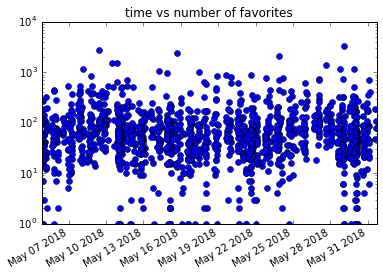

In [7]:
#print(user_corpus)
print(amplified_users)

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

print(user_history['timestamps'][0])
print(mdates.date2num(user_history['timestamps'][0]))
    
xx = mdates.date2num(user_history['timestamps'])

plt.figure()
plt.plot_date(xx,user_history['favorite_count']) # fmt="k-"  if you want lines
plt.gcf().autofmt_xdate()
plt.yscale('log')
plt.title('time vs number of favorites')
plt.show()


#plt.figure()
#plt.plot_date(xx,user_history['retweet_count']) # fmt="k-"  if you want lines
#plt.gcf().autofmt_xdate()
#plt.yscale('log')
#plt.title('time vs number of retweets')
#plt.show()





In [5]:
# how about, get related people by looking at who is getting retweeted


